# GRAVITY data reduction process: Generating plots for the CO line 


**Pablo Marcos-Arenal**

Centro de Astrobiología (INTA-CSIC)

---

> 📘
**NOTE:** This file is a copy of the Marcos_Arenal_2020_figures.ipynb notebook. 
>Its dedicated only to the CO emission line, without affecting the $Br\gamma$ baseline file.

This file intends to cover the full data reduction process and analysis of near-infrared K- band observations with the GRAVITY interferometer at Very Large Telescope Interferometer (VLTI) at the Paranal Observatory. 

These observations of Herbig Ae/Be stars provide with spatially and spectrally resolved data of their inner disks.

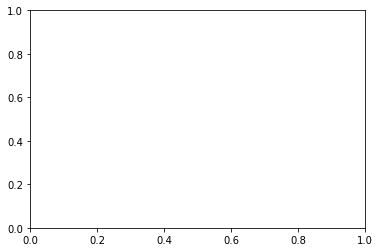

In [2]:
#Import modules
import numpy as np
import pandas as pd
from gravi_plot_functions import *
import gravity_plots_generator as gpg
import matplotlib.gridspec as gridspec
from scipy.signal import convolve as scipy_convolve


miV590Mon = gpg.InputStar('V590Mon','COb')
miPDS281 = gpg.InputStar('PDS281','COb')
miHD94509 = gpg.InputStar('HD94509','COb')
miDGCir = gpg.InputStar('DGCir','COb')
miHD141926 = gpg.InputStar('HD141926','COb')

all_sources = [miV590Mon,miPDS281,miHD94509,miDGCir,miHD141926]


plot_figure = True
save_figure = False


# Set up
The previously processed observation still need to get a post-processing calibration in order to retrieve some Bad-pixels effect and telluric lines. It will also be continuum-corrected afterwards.

First, the Flux and visibilities for each telescope unit is represented as a function of wavelength.

The calibration images do also need to get Bad-pixels correction.

### Flux
Plot of the flux for each of the units [U1,U2,U3,U4] and its averaged value. 
This plot outlines spurious lines that needs to be removed. 

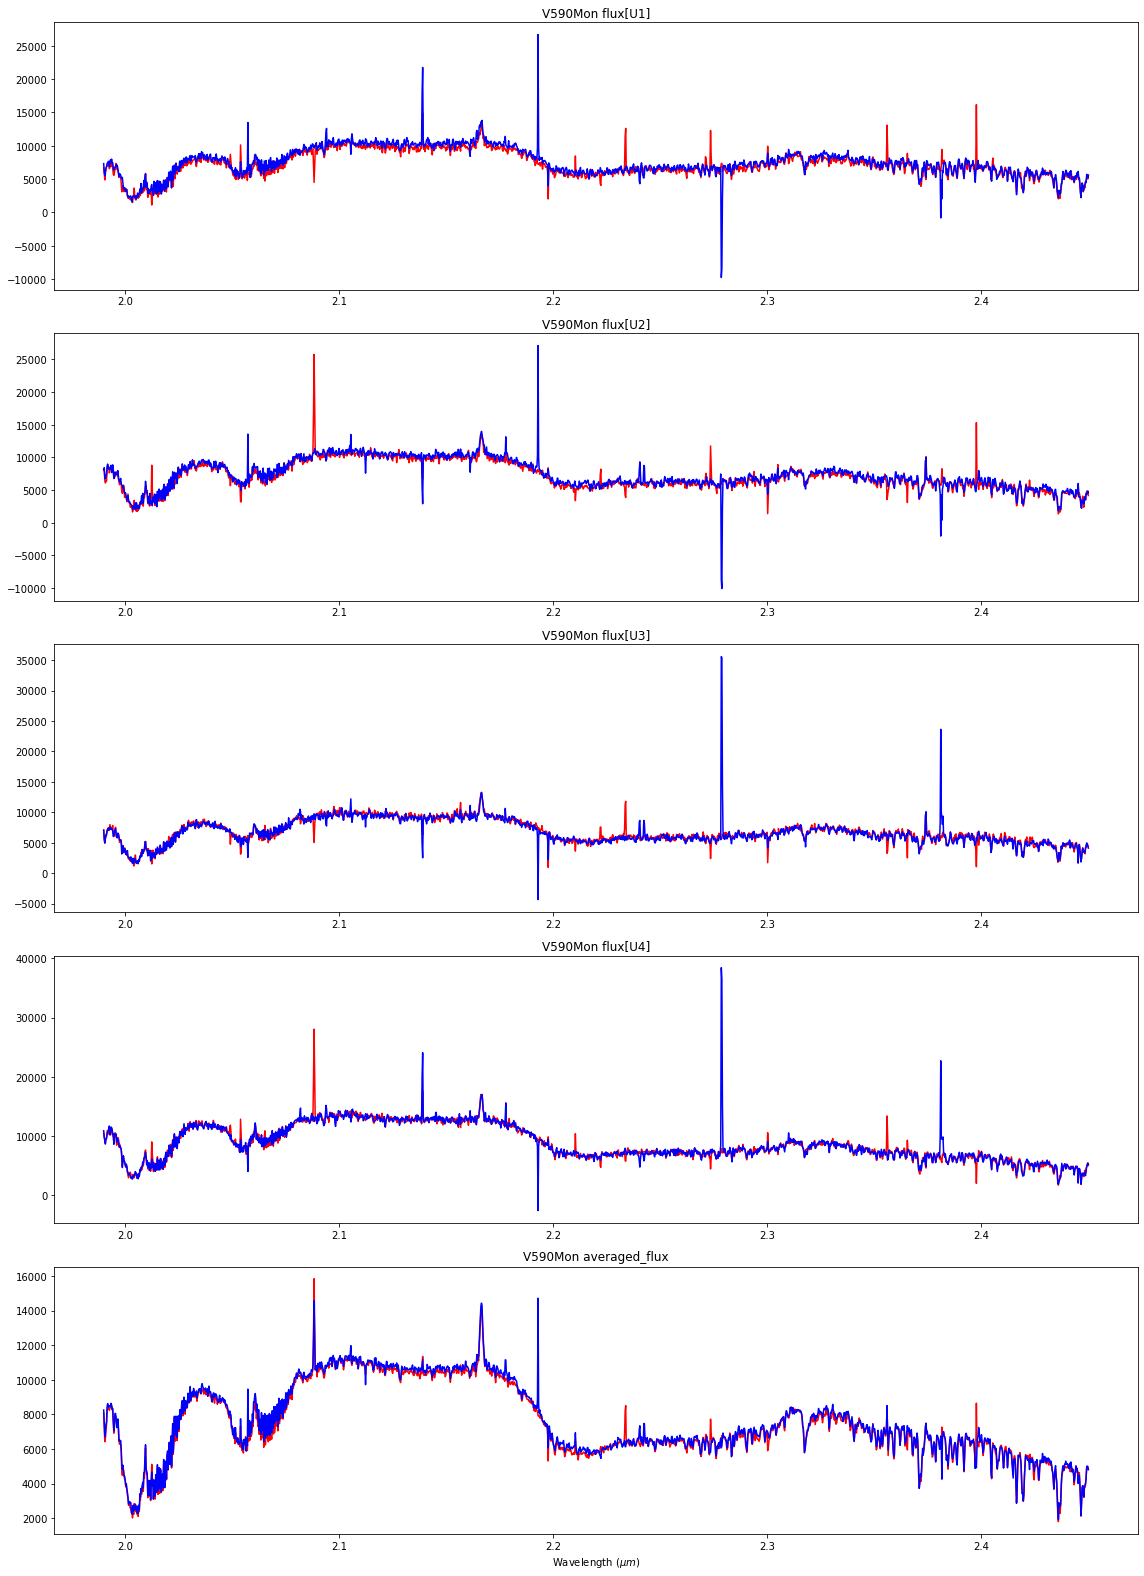

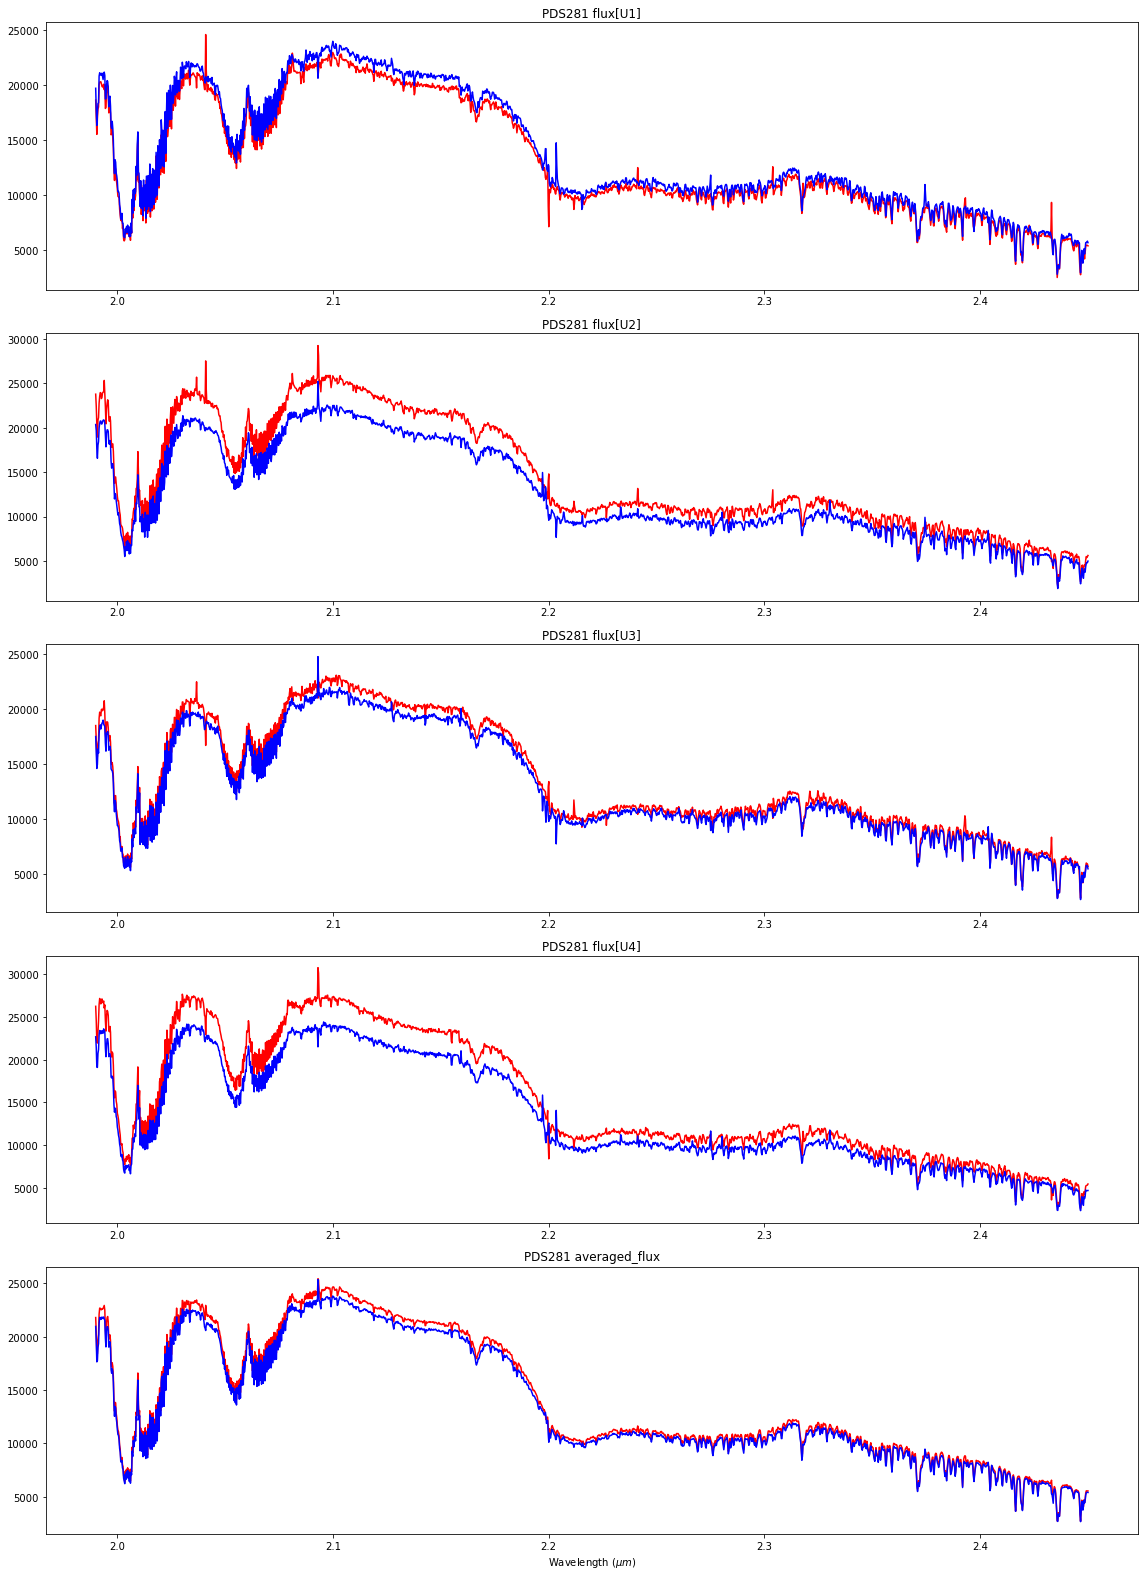

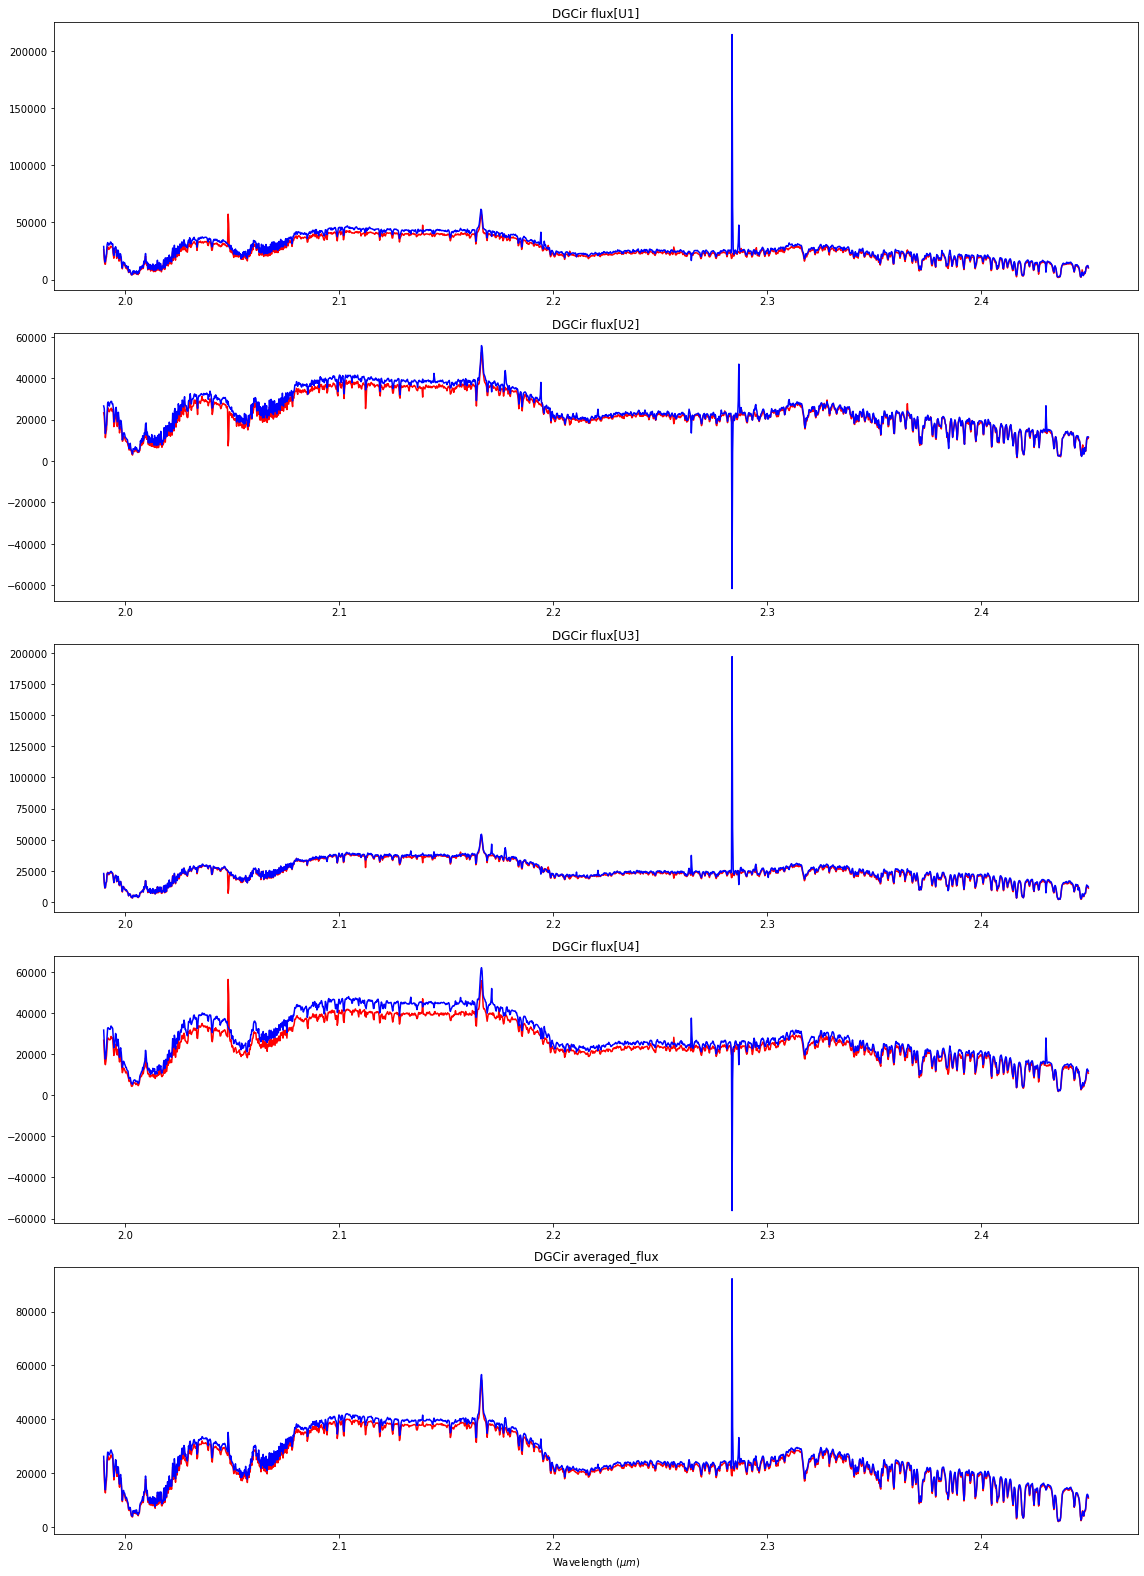

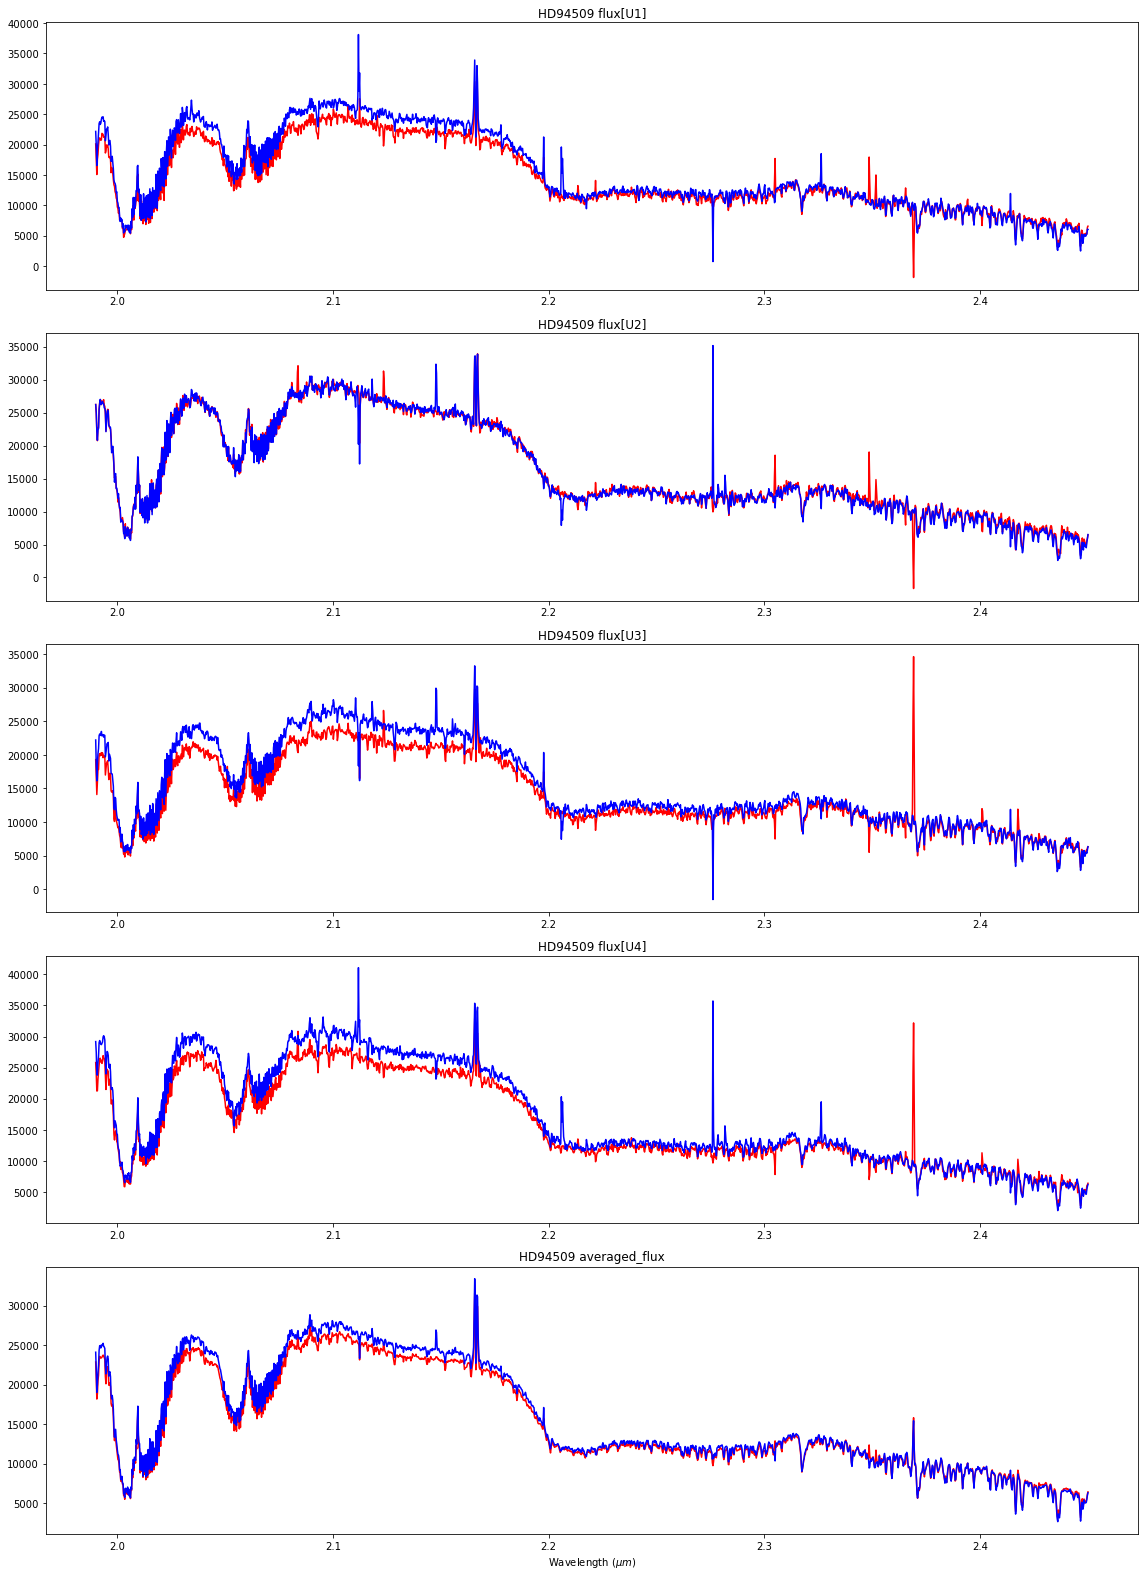

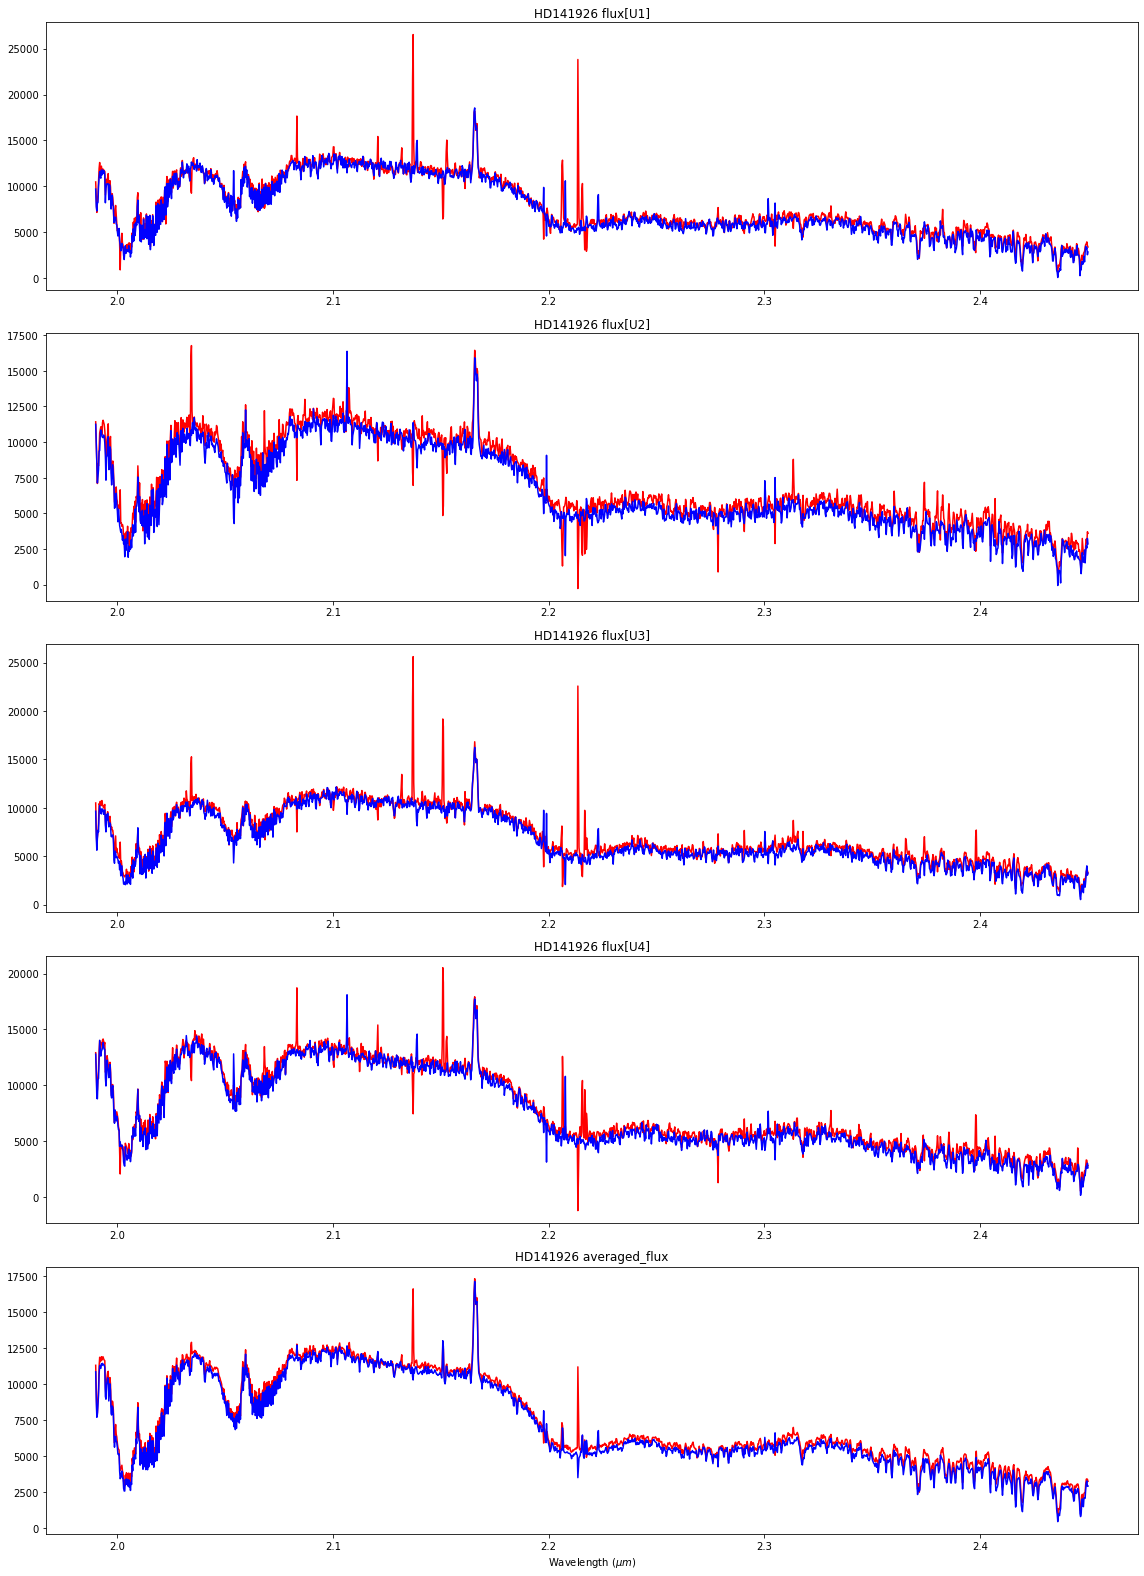

In [3]:
miV590Mon.figure_flux_preprocessing(plot_figure, save_figure)
miPDS281.figure_flux_preprocessing(plot_figure, save_figure)
miDGCir.figure_flux_preprocessing(plot_figure, save_figure)
miHD94509.figure_flux_preprocessing(plot_figure, save_figure)
miHD141926.figure_flux_preprocessing(plot_figure, save_figure)

## Squared visibility in full range

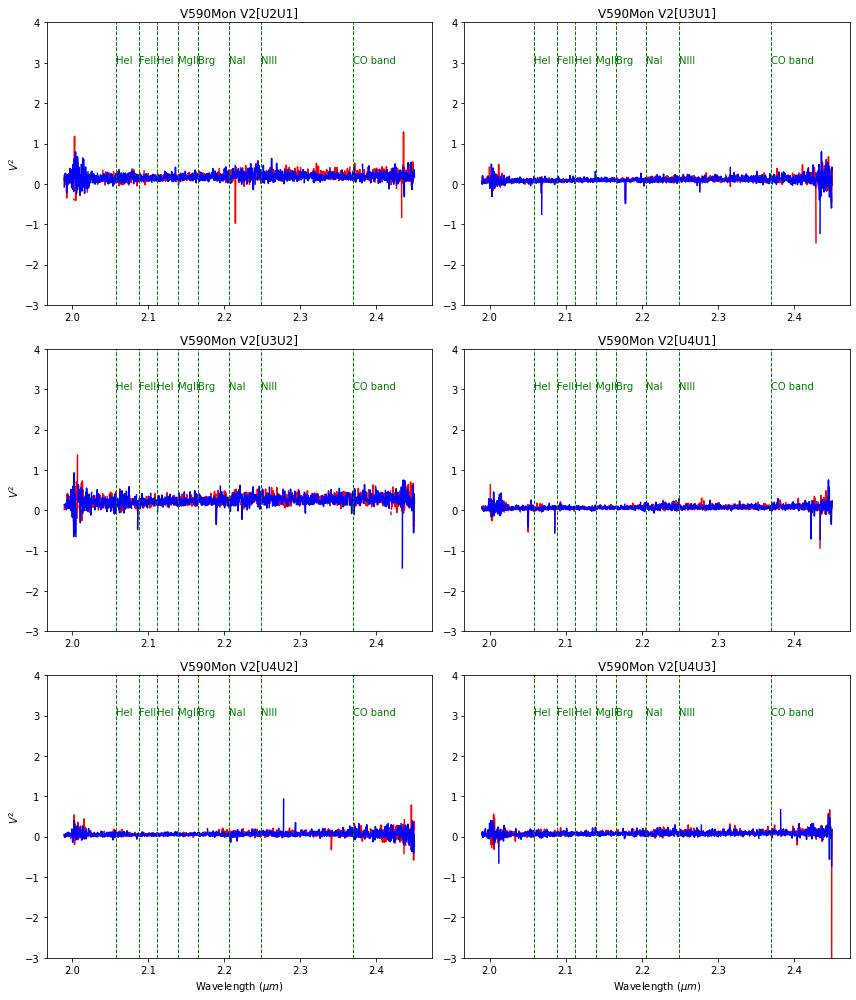

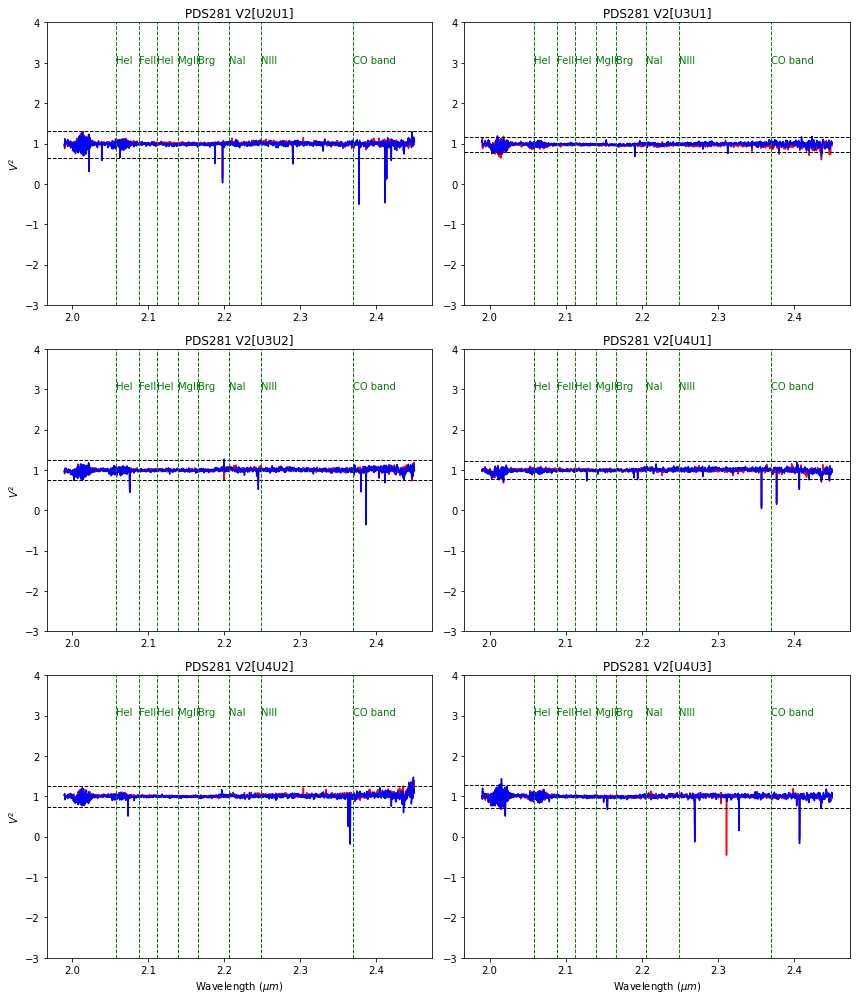

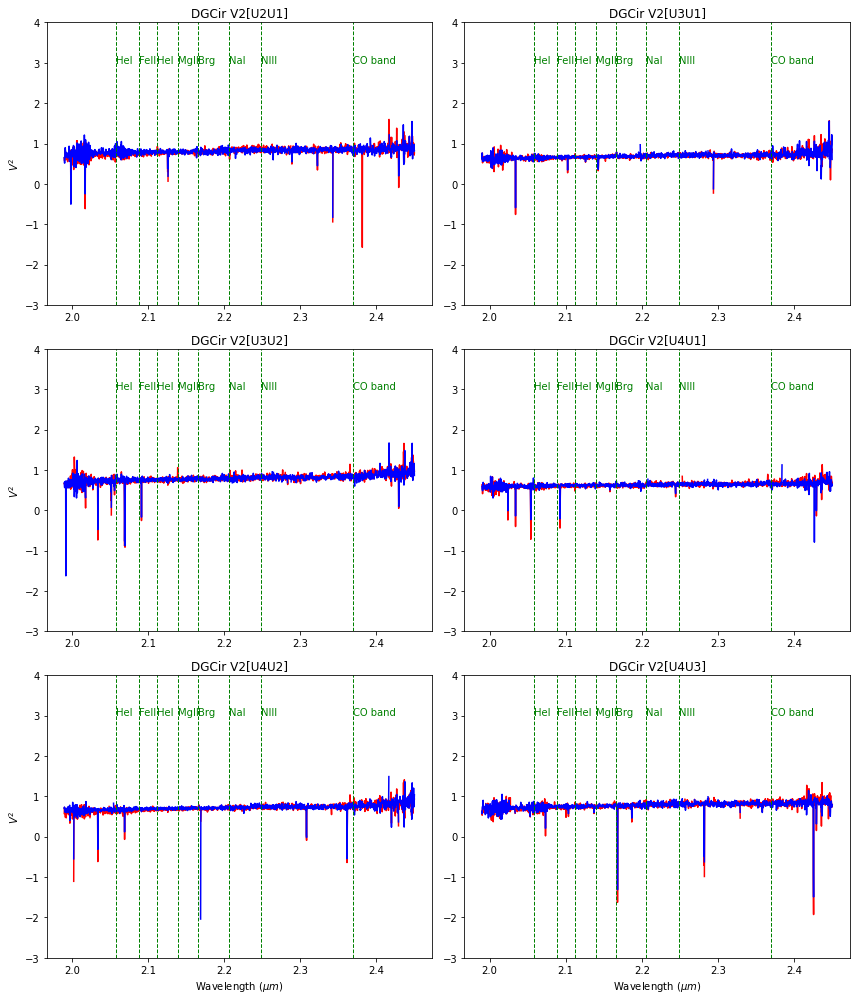

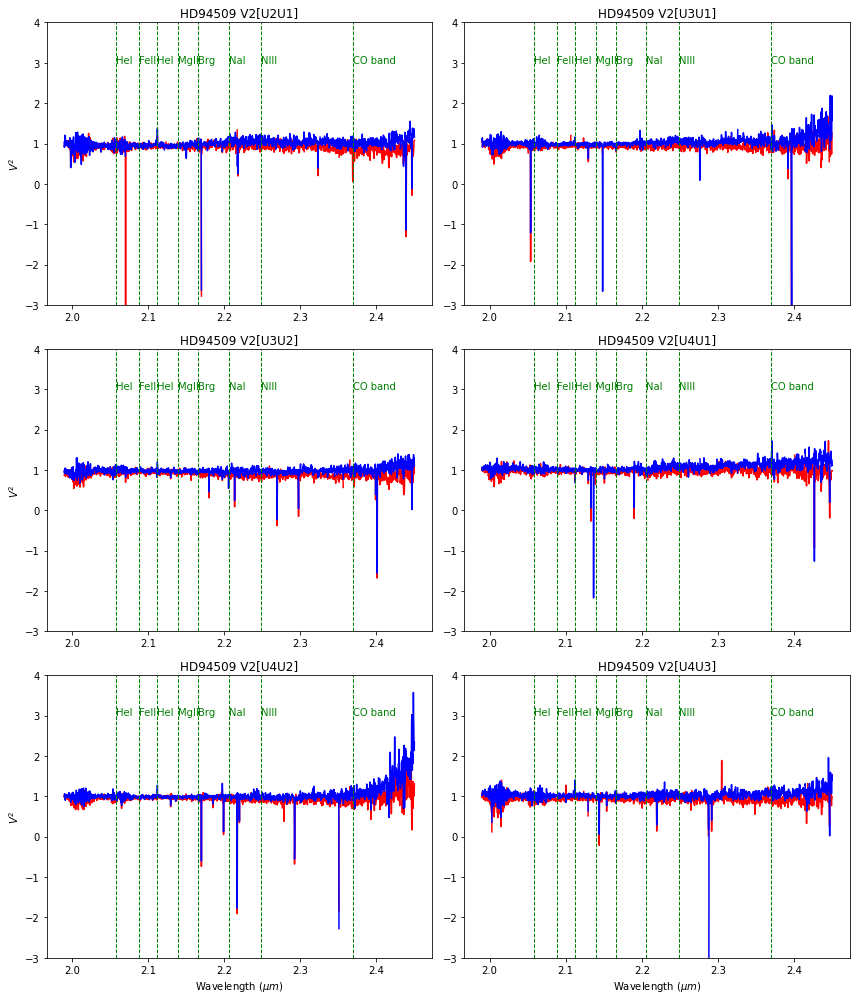

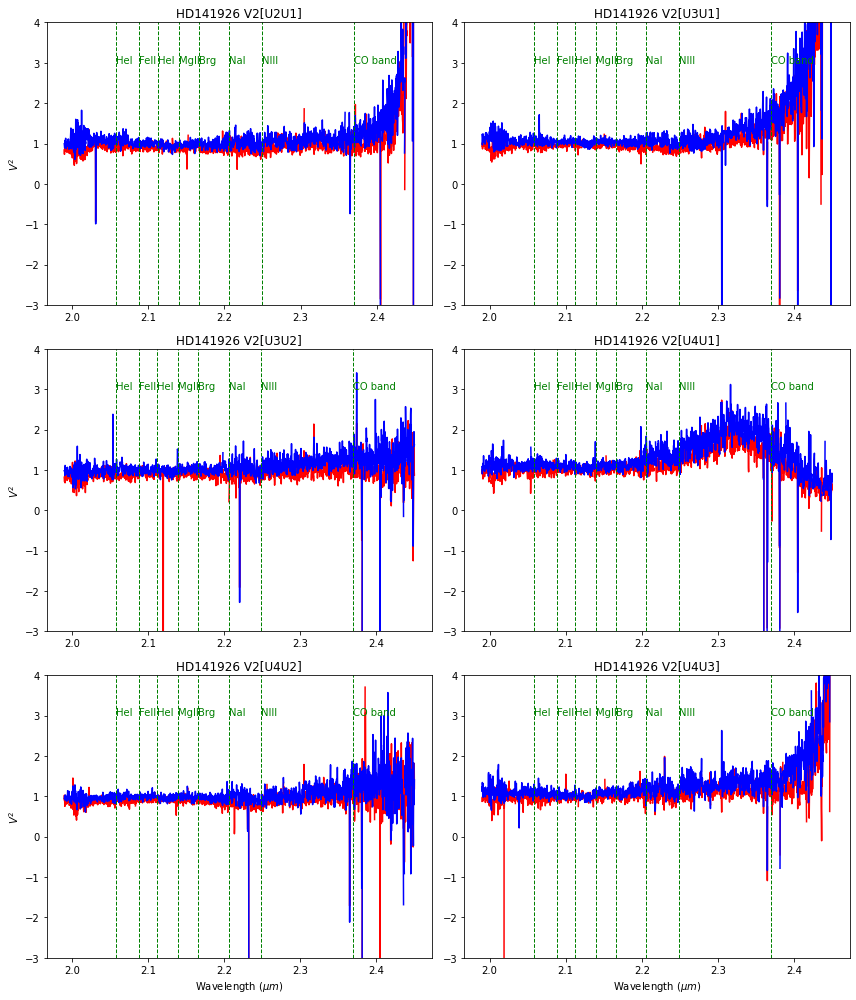

In [4]:
miV590Mon.figure_full_range_visibility_preprocessing(plot_figure, save_figure)
miPDS281.figure_full_range_visibility_preprocessing(plot_figure, save_figure)
miDGCir.figure_full_range_visibility_preprocessing(plot_figure, save_figure)
miHD94509.figure_full_range_visibility_preprocessing(plot_figure, save_figure)
miHD141926.figure_full_range_visibility_preprocessing(plot_figure, save_figure)

### Bad pixels removal
Using the previous figures as a reference, we will remove these sporeus lines coming from bad pixels adding signal to the spectrum and not coming from the observed source.

It is created a *bad pixel map* where every wavelength channel has a value of 1 if it is correct and 0 if it is associated to a bad pixel. 

It is set the *rejection\_criterium\_flux*  variable with the fraction to establish whether a difference between to datasets can be considered a bad pixel or not. We apply this criterium to fluxes and visibilities to cross-calibrate the rejection criterium.

The *general\_rejection\_criterium* is applied to the final *bad\_pixel\_mask* to take in account both fluxes and visibilities rejection criteria as a whole.

These results are plotted in pixel maps where pixels associated to wavelength channels are distributed left to right and top to bottom to cover a rectangular map. 
        



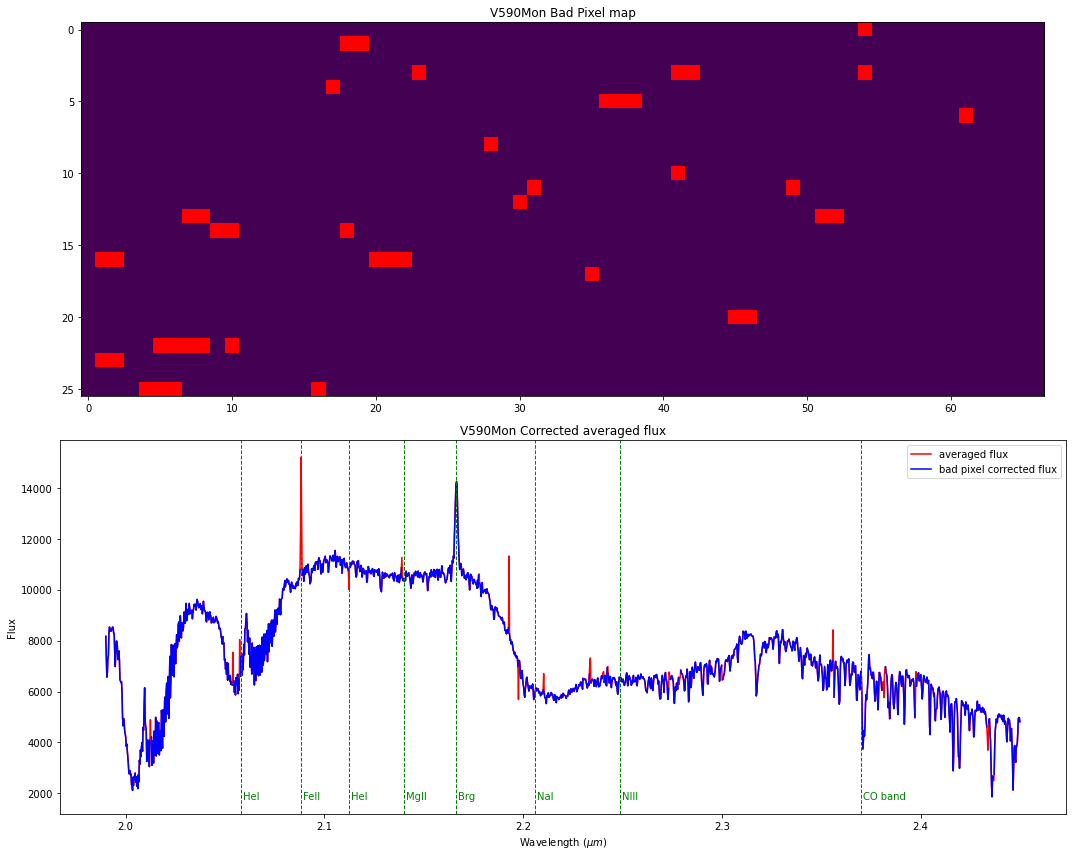

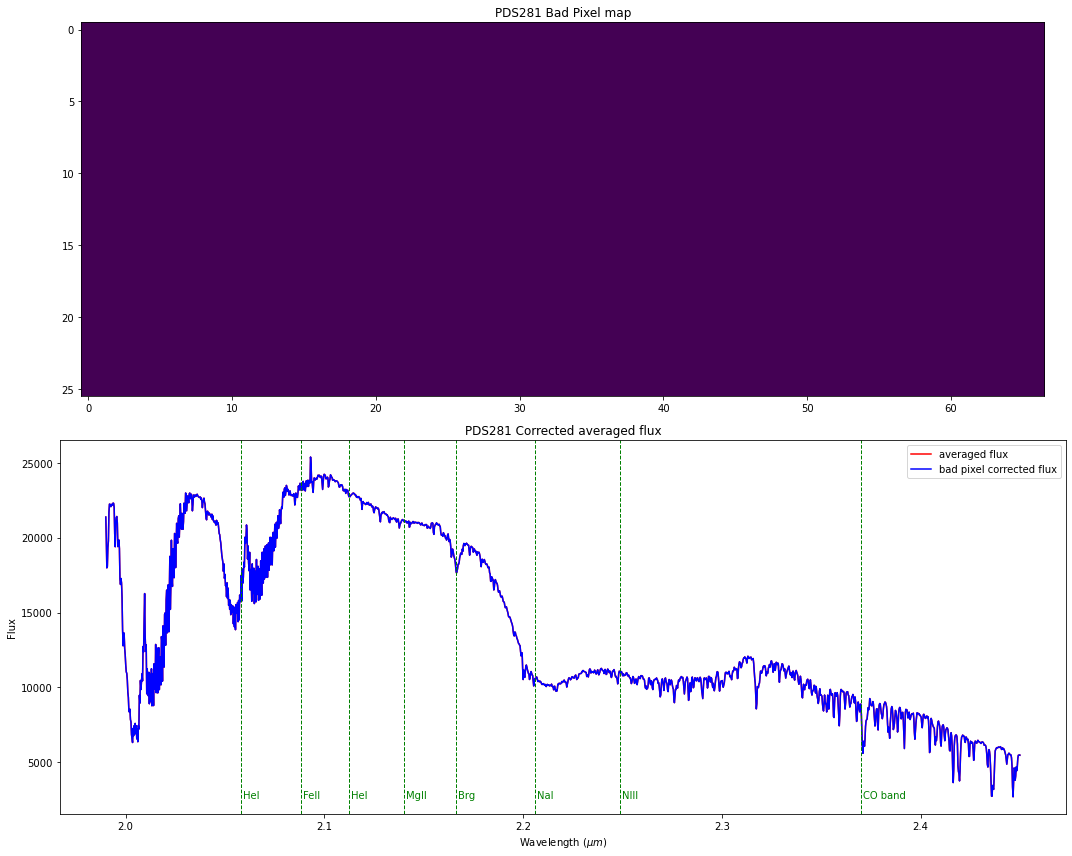

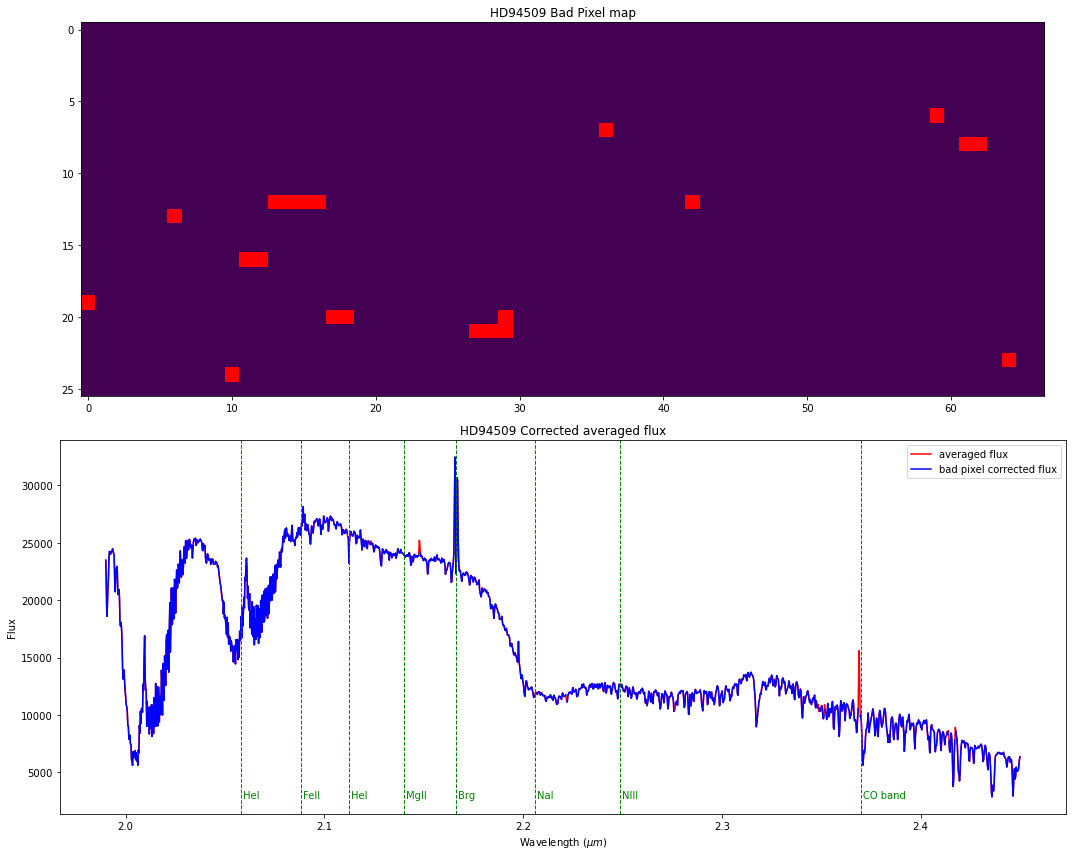

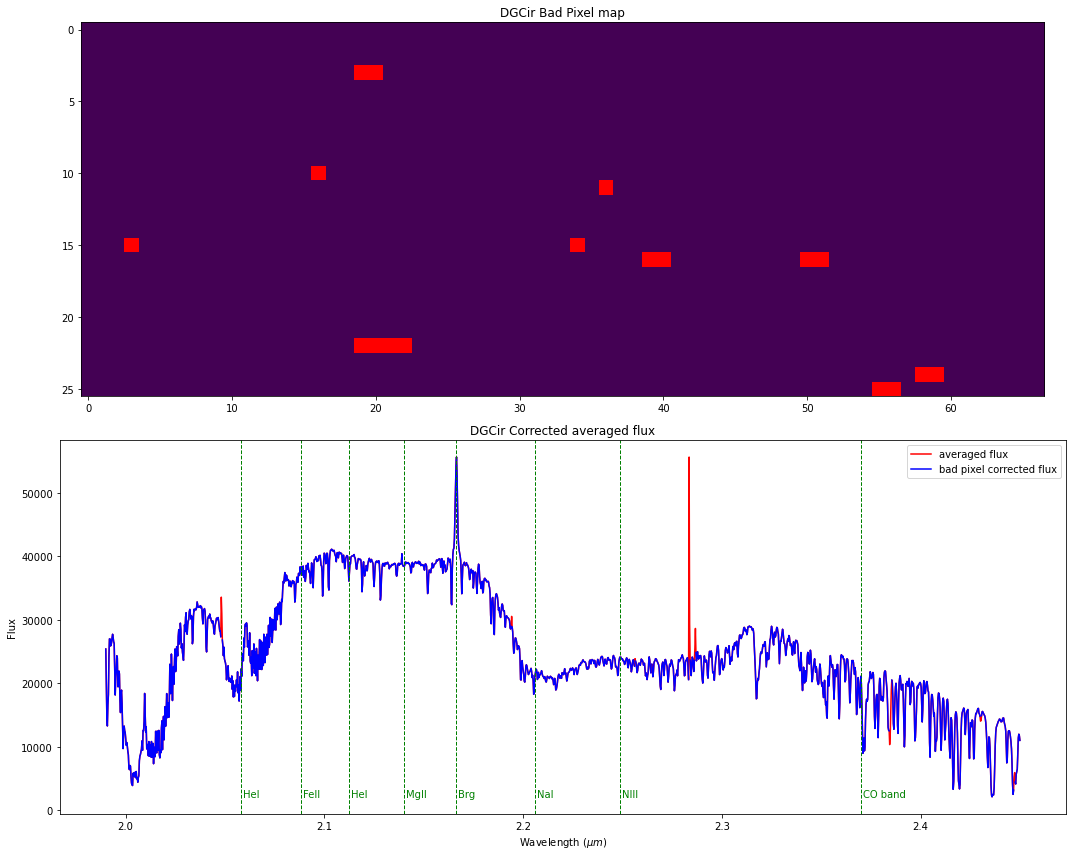

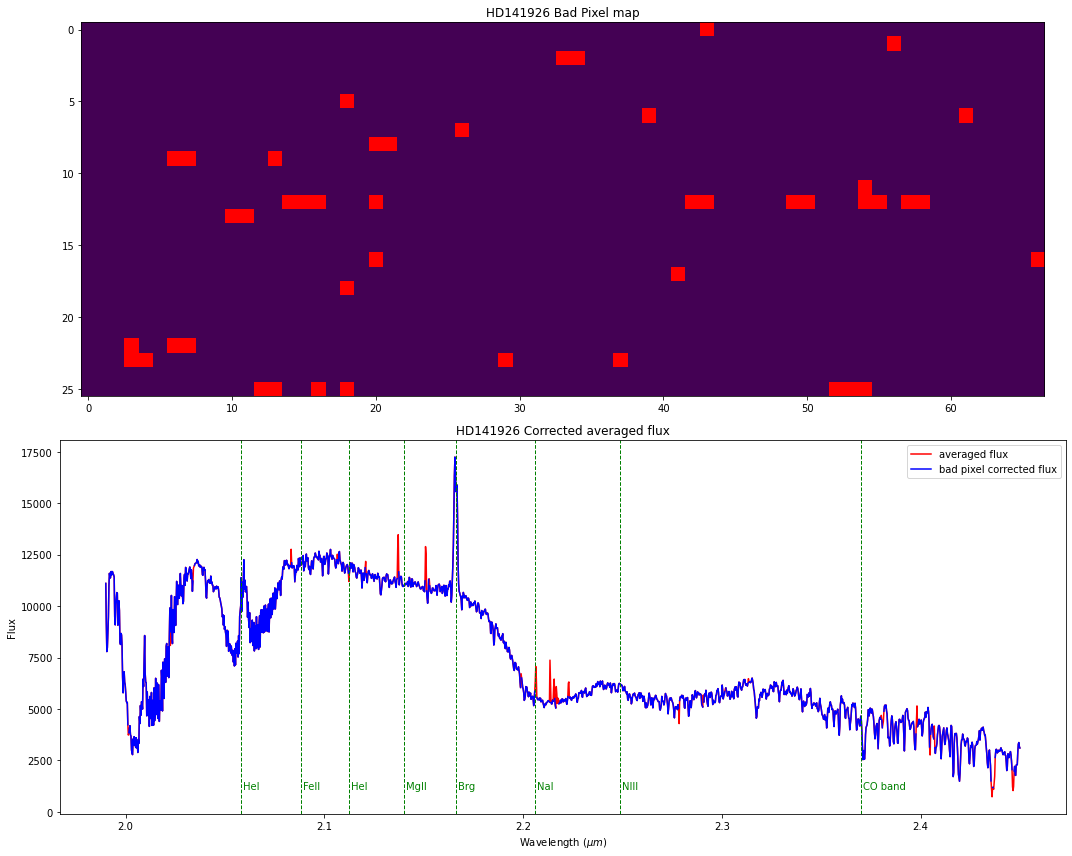

In [5]:
miV590Mon.figure_badpixel_flux_preprocessing(plot_figure, save_figure)
miPDS281.figure_badpixel_flux_preprocessing(plot_figure, save_figure)
miHD94509.figure_badpixel_flux_preprocessing(plot_figure, save_figure)
miDGCir.figure_badpixel_flux_preprocessing(plot_figure, save_figure)
miHD141926.figure_badpixel_flux_preprocessing(plot_figure, save_figure)

### Bad Pixel removal from calibration spectra
In this case, there is also a replacement of Bad Pixels by NaN data, but those holes are now replaced by an interpolated value through convolution.
This cannot be the case in science image because we will be replacing observational data (which might be incorrect) by interpolated data. 
What we do is using NaN to make sure that we do not compute Bad Data in our wavelengths channels of interest.
For calibration data we do can replace bad data with interpolated data, specially in that wavelengths ranges where we are interested in but the calibrator matches with Bad pixels.

We use the averaged the flux of both observations in all telescope units to get the convolved flux. 
All fluxes (in both observations an all telescope units) are compared to this to remove bad pixels and substitute them by NaN. These are replaced afterwards by a new averaged flux (after bad pixels removal).  

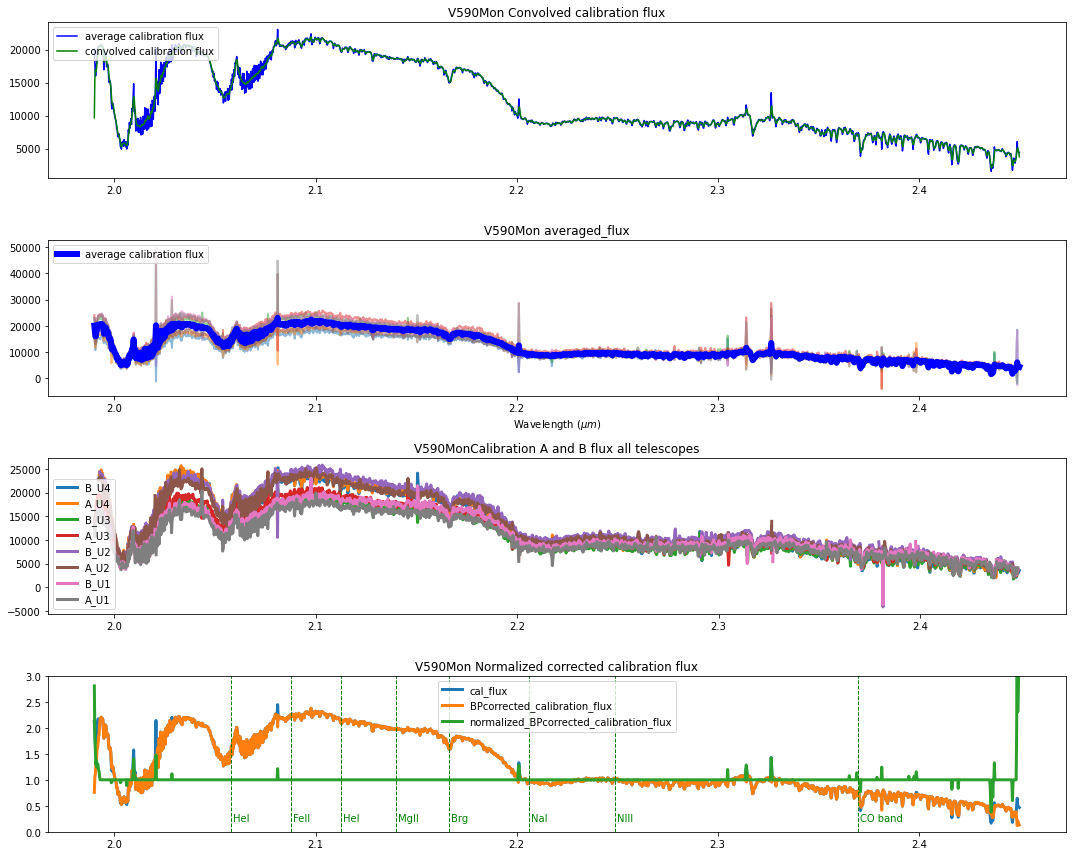

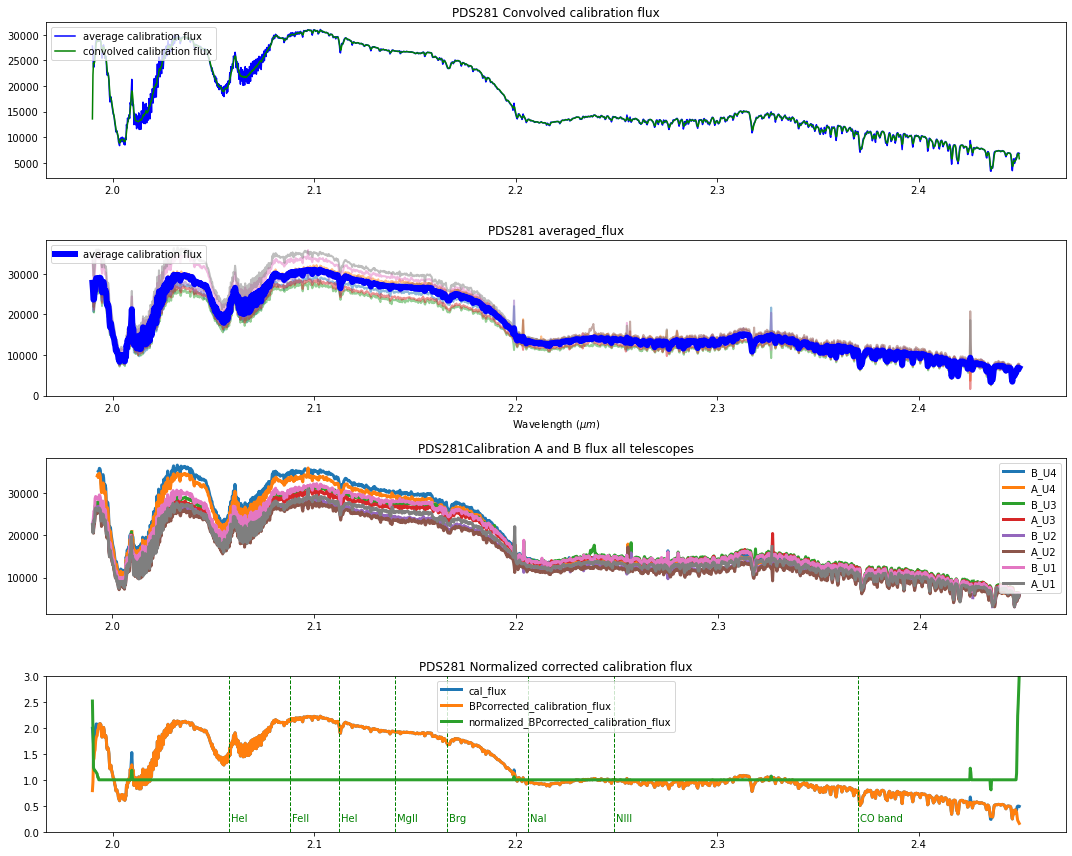

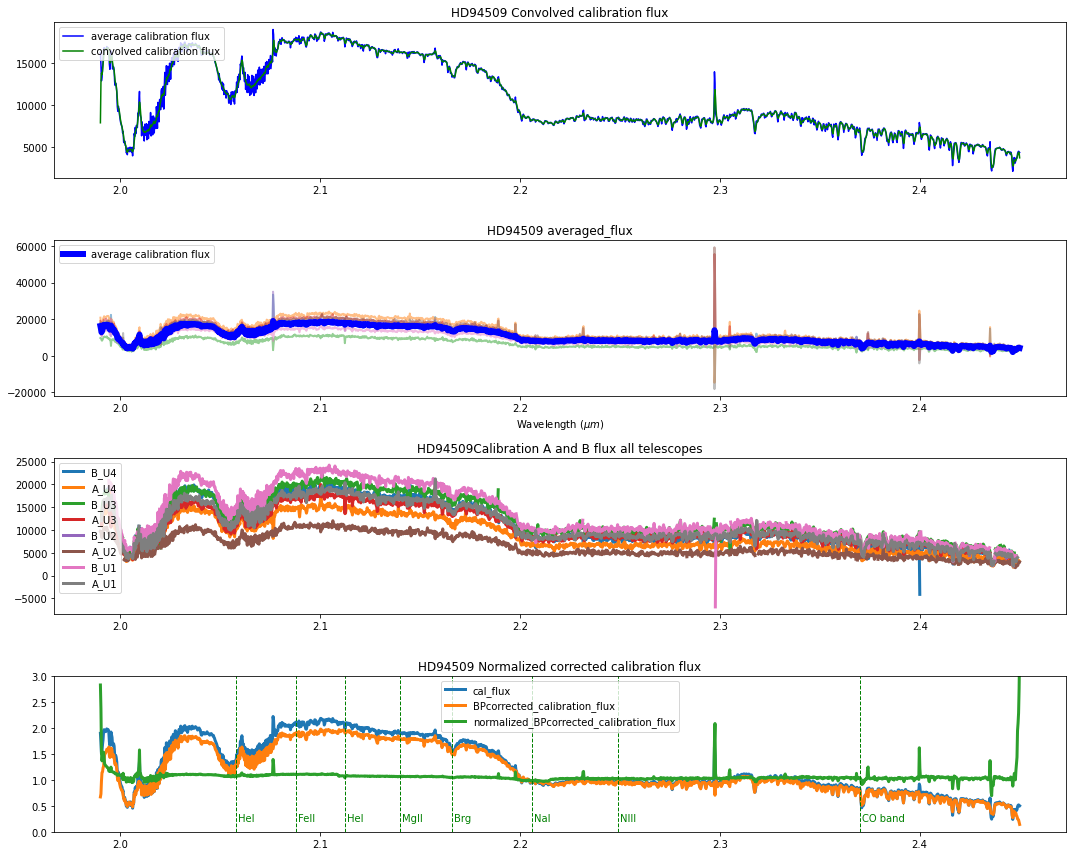

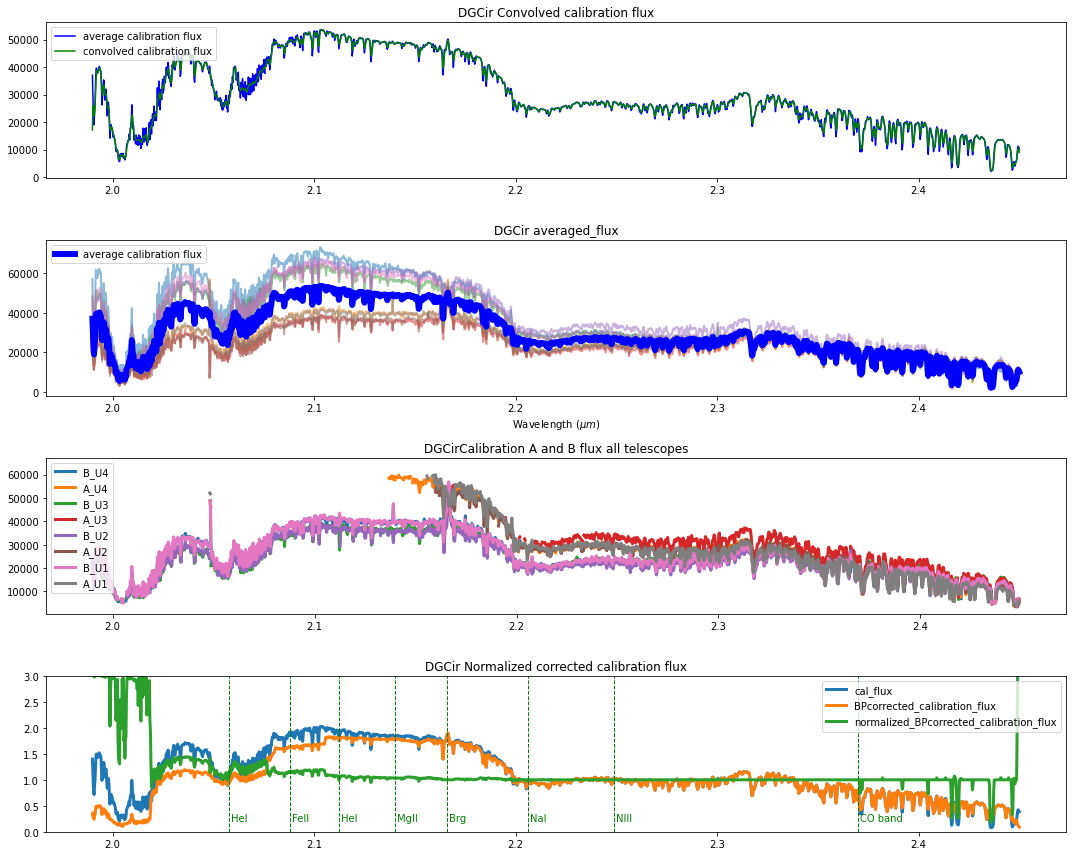

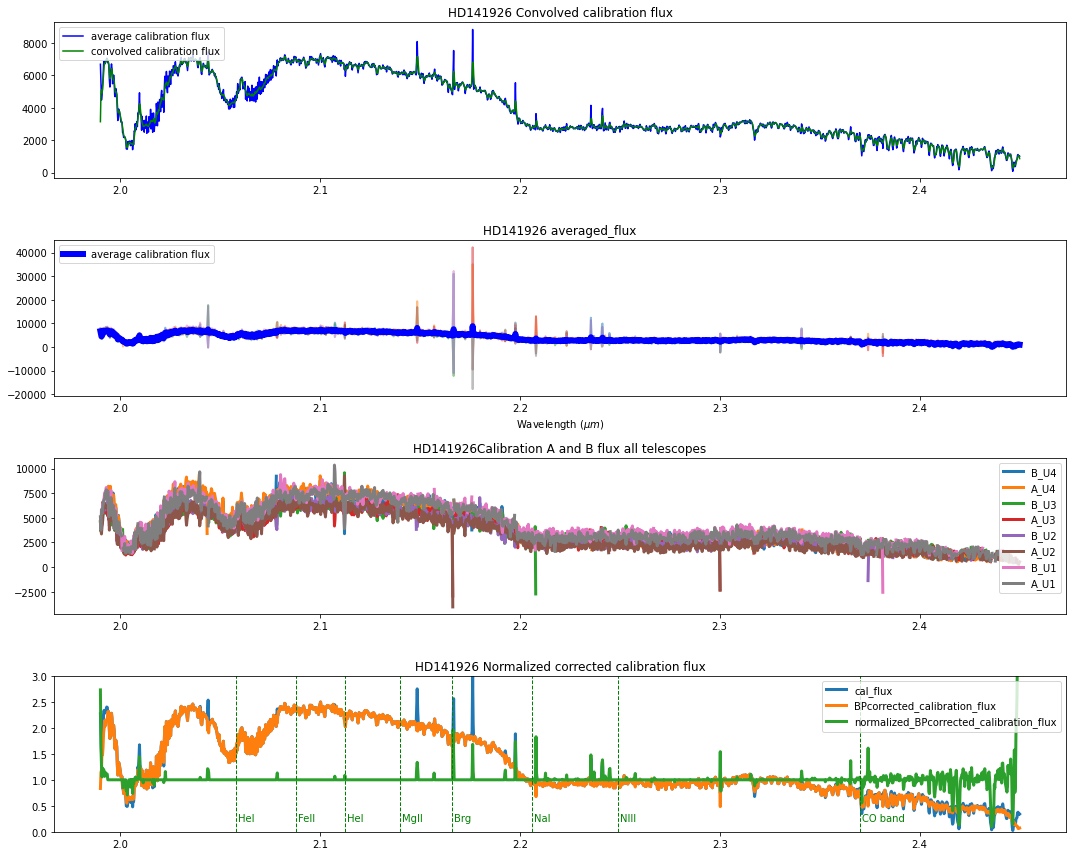

<Figure size 1296x864 with 0 Axes>

In [6]:
miV590Mon.figure_badpixel_calibration_preprocessing(0.5,plot_figure, save_figure)
miPDS281.figure_badpixel_calibration_preprocessing(0.5,plot_figure, save_figure)
miHD94509.figure_badpixel_calibration_preprocessing(0.5, plot_figure, save_figure)
miDGCir.figure_badpixel_calibration_preprocessing(0.5, plot_figure, save_figure)
miHD141926.figure_badpixel_calibration_preprocessing(0.5, plot_figure, save_figure)


### Bad Pixel removal from visibilities 
Outliers in visibilities are not necesarily removed in the previous bad pixel in flux
since outliers in different baselines seem not to be related to a common pixel map. 
Therefore all outliers are rejected based on a different criterium. 
Since there are no shifts in visibilities for any of our sources (see figures generated at figure_full_range_visibility_preprocessing() function), we can simply reject outliers > sigma_coefficient * standard deviation. 

This is similar to use a different bad pixel mask for each baseline.


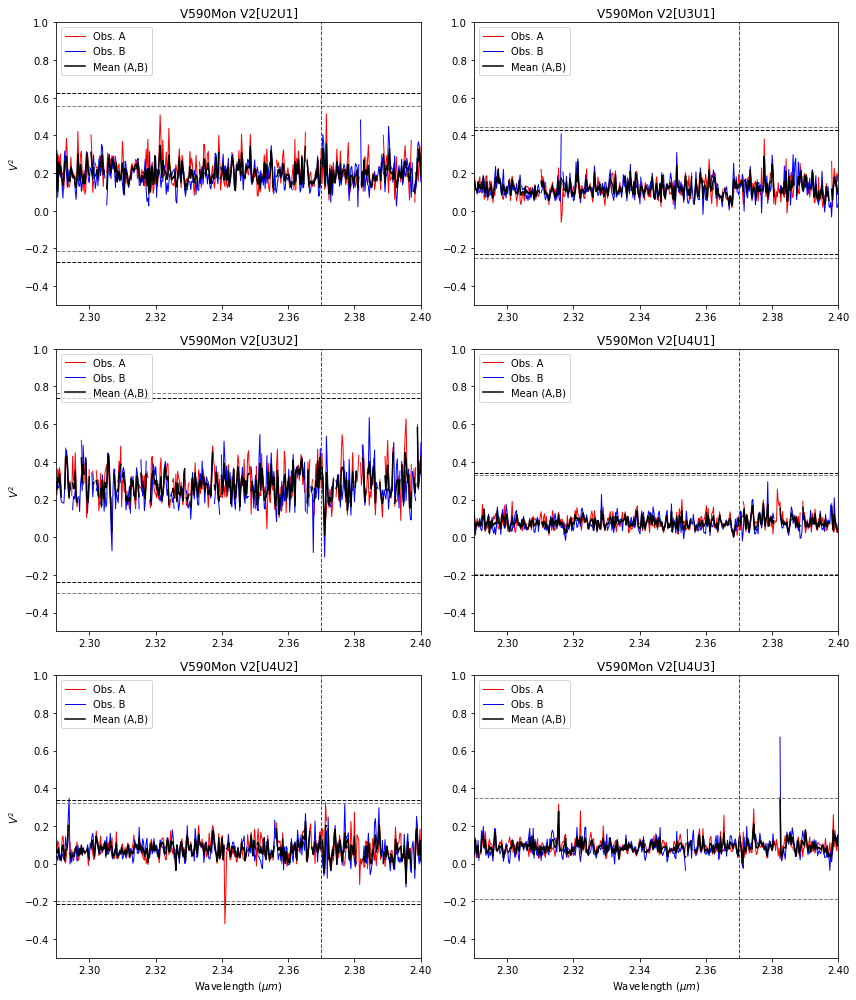

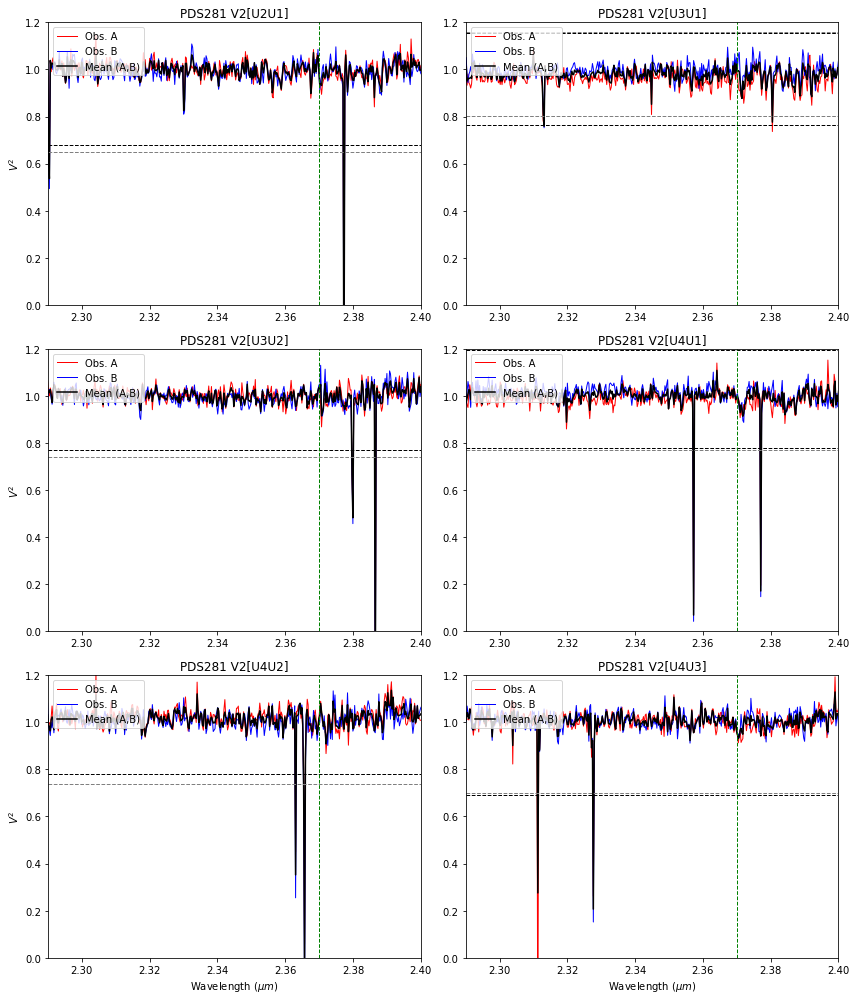

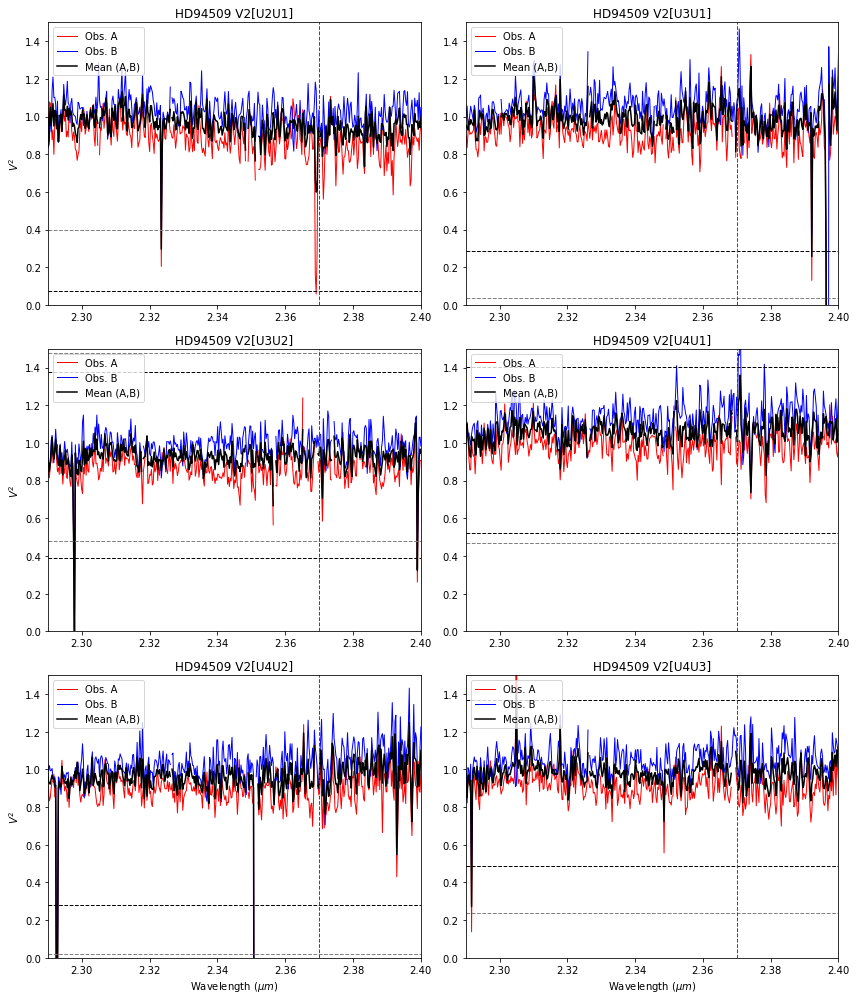

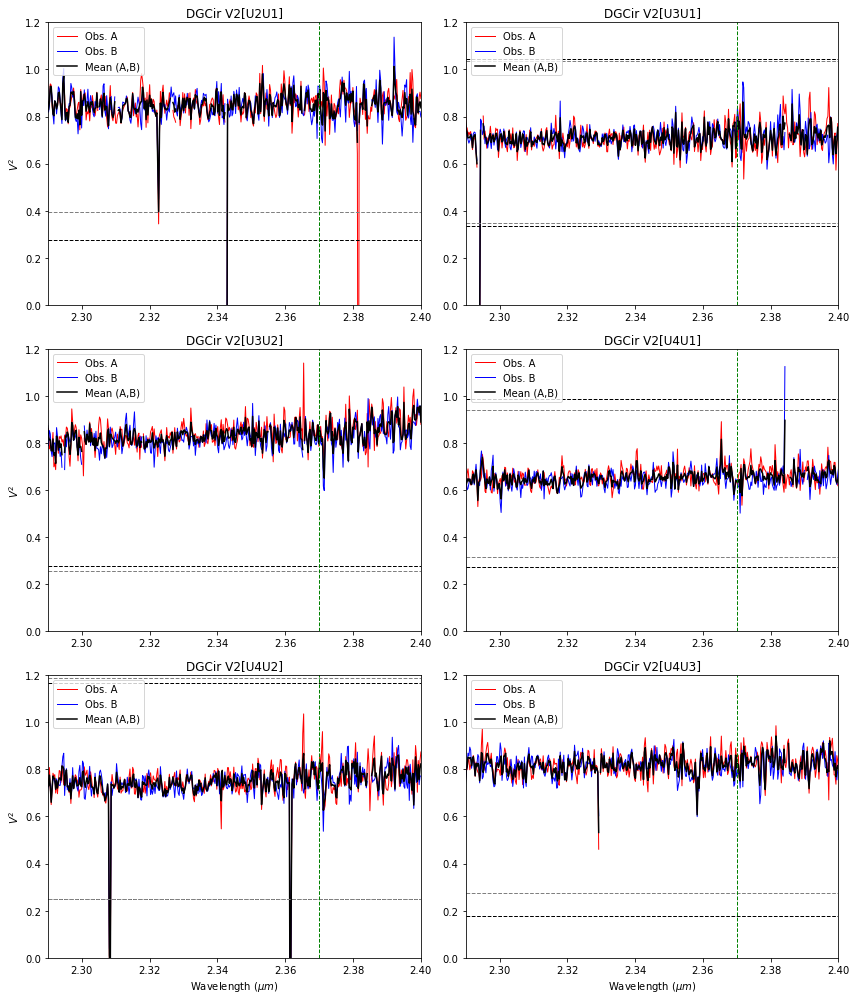

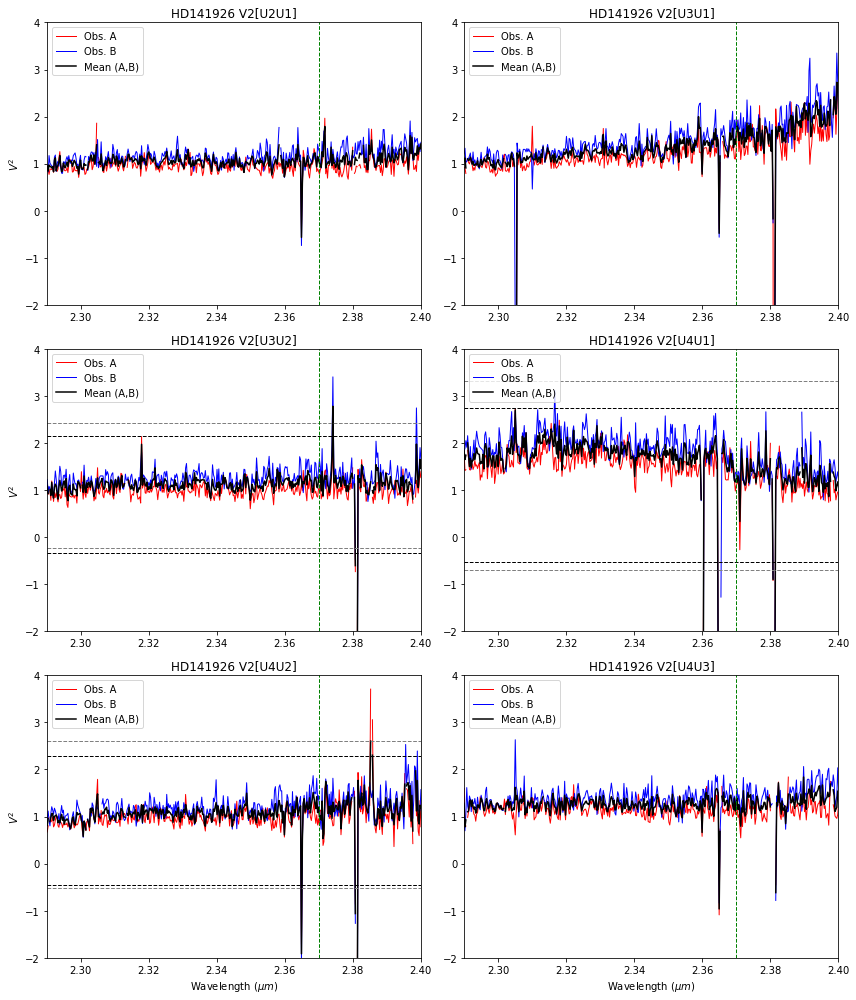

In [7]:
sigma_coefficient = 4
plot_figure = True

x_axis_lim = [1.98,2.45]
x_axis_lim = [2.29,2.4]
y_axis_lim = [0,0.5]
y_axis_lim = [-0.5,1]
miV590Mon.figure_badpixel_V2_preprocessing(x_axis_lim,y_axis_lim, sigma_coefficient, plot_figure, save_figure)

y_axis_lim = [0.9,1.1]
y_axis_lim = [0,1.2]
miPDS281.figure_badpixel_V2_preprocessing(x_axis_lim,y_axis_lim, sigma_coefficient, plot_figure, save_figure)

y_axis_lim = [0.0,1.25]
y_axis_lim = [0,1.5]
miHD94509.figure_badpixel_V2_preprocessing(x_axis_lim,y_axis_lim, sigma_coefficient, plot_figure, save_figure)

y_axis_lim = [0.0,1]
y_axis_lim = [0,1.2]
miDGCir.figure_badpixel_V2_preprocessing(x_axis_lim,y_axis_lim, sigma_coefficient, plot_figure, save_figure)

y_axis_lim = [0.6,1.4]
y_axis_lim = [-2,4]
miHD141926.figure_badpixel_V2_preprocessing(x_axis_lim,y_axis_lim, sigma_coefficient, plot_figure, save_figure)



### Remove HD 94509 outliers manually
Negative values of $V^2$ in every baseline will be replaced by NaNs. This NaNs will be replaced afterwards.

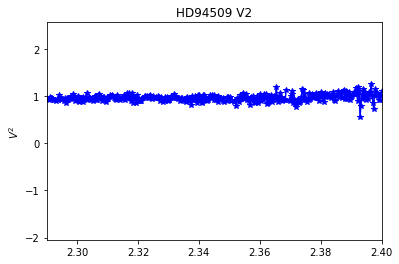

In [8]:
#x_axis_lim = [2.27,2.4]


source = miHD94509
HD94509_rejection_limit = 0

#Calculate index of the plot limits         
index_lower_x_axis_lim = min(range(len(source.wl_A)), key=lambda i: abs(source.wl_A[i]-x_axis_lim[0]))
index_higher_x_axis_lim  = min(range(len(source.wl_A)), key=lambda i: abs(source.wl_A[i]-x_axis_lim[1]))

   
for  key, value in source.visibility2.items():
    #print(key,source.visibility2[key][index_lower_x_axis_lim:index_higher_x_axis_lim])
    for index in range(index_lower_x_axis_lim,index_higher_x_axis_lim):
        if source.visibility2[key][index]<HD94509_rejection_limit:
            source.visibility2[key][index] = np.NaN

              
fig, ax = plt.subplots()

# Plot subplots
ax.plot(source.wl_A, source.visibility2['U4U2'], "*-b",label='Mean (A,B)')
ax.set_title(source.source + ' V2')
ax.set_ylabel('$V^2$')
ax.set_xlim(x_axis_lim)


#Save figure
if save_figure:
    #Save figure to disk
    fig.savefig('./figures/'+str(source.source) + "_outliers_removal" + ".eps", dpi=300)


#Close figure if plot_figure=False
if plot_figure==False:
    plt.close(fig)    # close the figure window
 

### Remove DGCir outlers manually
Negative values of $V^2$ will be replaced by NaNs. This NaNs will be replaced afterwards.

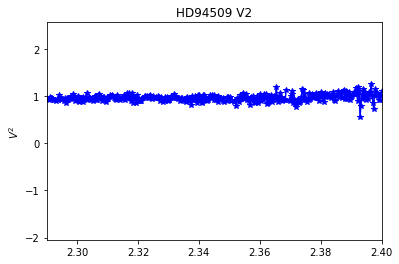

In [9]:
#x_axis_lim = [2.27,2.4]


source = miHD94509
HD94509_rejection_limit = 0

#Calculate index of the plot limits         
index_lower_x_axis_lim = min(range(len(source.wl_A)), key=lambda i: abs(source.wl_A[i]-x_axis_lim[0]))
index_higher_x_axis_lim  = min(range(len(source.wl_A)), key=lambda i: abs(source.wl_A[i]-x_axis_lim[1]))

   
for  key, value in source.visibility2.items():
    #print(key,source.visibility2[key][index_lower_x_axis_lim:index_higher_x_axis_lim])
    for index in range(index_lower_x_axis_lim,index_higher_x_axis_lim):
        if source.visibility2[key][index]<HD94509_rejection_limit:
            source.visibility2[key][index] = np.NaN

              
fig, ax = plt.subplots()

# Plot subplots
ax.plot(source.wl_A, source.visibility2['U4U2'], "*-b",label='Mean (A,B)')
ax.set_title(source.source + ' V2')
ax.set_ylabel('$V^2$')
ax.set_xlim(x_axis_lim)


#Save figure
if save_figure:
    #Save figure to disk
    fig.savefig('./figures/'+str(source.source) + "_outliers_removal" + ".eps", dpi=300)


#Close figure if plot_figure=False
if plot_figure==False:
    plt.close(fig)    # close the figure window
 

### Replace NaN values in flux, visibilities and phases
Once the Bad Pixel removal is applied, NaN values sustitute these Bad Pixels positions. We verify that these NaN values doesn't correspond to spectral lines were science data is retrieved before replacing these NaN values by a convolved value around that position with the *replace_nans_by_interpolated_gaussian()* function in module *gravi_plot_functions*.

In [10]:

#Replace NaN in BPcorrected_flux 
miV590Mon.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miV590Mon.BPcorrected_flux,10)
miPDS281.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miPDS281.BPcorrected_flux,10)
miHD94509.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miHD94509.BPcorrected_flux,10)
miDGCir.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miDGCir.BPcorrected_flux,10)
miHD141926.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miHD141926.BPcorrected_flux,10)

#Replace NaN in visibility2 
for key,value in miV590Mon.visibility2.items():
    miV590Mon.visibility2[key]=replace_nans_by_interpolated_gaussian(miV590Mon.visibility2[key],5)
for key,value in miPDS281.visibility2.items():
    miPDS281.visibility2[key]=replace_nans_by_interpolated_gaussian(miPDS281.visibility2[key],5)
for key,value in miHD94509.visibility2.items():
    miHD94509.visibility2[key]=replace_nans_by_interpolated_gaussian(miHD94509.visibility2[key],5)
for key,value in miDGCir.visibility2.items():
    miDGCir.visibility2[key]=replace_nans_by_interpolated_gaussian(miDGCir.visibility2[key],5)
for key,value in miDGCir.visibility2.items():
    miHD141926.visibility2[key]=replace_nans_by_interpolated_gaussian(miHD141926.visibility2[key],5)

    
#Replace NaN in diff_phase 
for key,value in miV590Mon.diff_phase.items():
    miV590Mon.diff_phase[key]=replace_nans_by_interpolated_gaussian(miV590Mon.diff_phase[key],5)
for key,value in miPDS281.diff_phase.items():
    miPDS281.diff_phase[key]=replace_nans_by_interpolated_gaussian(miPDS281.diff_phase[key],5)
for key,value in miHD94509.diff_phase.items():
    miHD94509.diff_phase[key]=replace_nans_by_interpolated_gaussian(miHD94509.diff_phase[key],5)
for key,value in miDGCir.diff_phase.items():
    miDGCir.diff_phase[key]=replace_nans_by_interpolated_gaussian(miDGCir.diff_phase[key],5)
for key,value in miDGCir.diff_phase.items():
    miHD141926.diff_phase[key]=replace_nans_by_interpolated_gaussian(miHD141926.diff_phase[key],5)
    
    
#Replace NaN in phase_closure 
for key,value in miV590Mon.phase_closure.items():
    miV590Mon.phase_closure[key]=replace_nans_by_interpolated_gaussian(miV590Mon.phase_closure[key],5)
for key,value in miPDS281.phase_closure.items():
    miPDS281.phase_closure[key]=replace_nans_by_interpolated_gaussian(miPDS281.phase_closure[key],5)
for key,value in miHD94509.phase_closure.items():
    miHD94509.phase_closure[key]=replace_nans_by_interpolated_gaussian(miHD94509.phase_closure[key],5)
for key,value in miDGCir.phase_closure.items():
    miDGCir.phase_closure[key]=replace_nans_by_interpolated_gaussian(miDGCir.phase_closure[key],5)
for key,value in miDGCir.phase_closure.items():
    miHD141926.phase_closure[key]=replace_nans_by_interpolated_gaussian(miHD141926.phase_closure[key],5)


### Telluric lines
The calibration flux is normalized to be used in telluric lines removal. 
The Flux is divided by this normalized calibration flux in order to retrieve continuum flux values around our spectral line of interest. 
The values of the spectral lines ($Br\gamma$ in our case) are not taken from the divided by normalized calibration flux since the calibration source also has its own emission line ($Br\gamma$) that shouldn't affect our spectral line of interest.

The corresponding plot is shown in the following section, together with the continuum measurement.


### Continuum Flux measurement
The continuum around our line of interest ($Br\gamma$) is measured in the flux data (after Bad-pixel removal) divided by the normalized calibration flux (Bad-pixel removed).
The following figure shows the wavelength range where the continuum is measured.

For the function *figure_flux_continuum_measurement()* is required to provide x_axis_lim, y_axis_lim.

It is required to provide the array *continuum_range*, where the first two elements are initial and final wavelengths of the left continuum range, while the last two elements are the initial and final wavelengths of the rigth continuum range.

It is also required to provide the *line_range* array with the initial and final wavelengths of the line to be writen to the final spectra.

> 📘
**NOTE:** Line is not divided by calibrator.

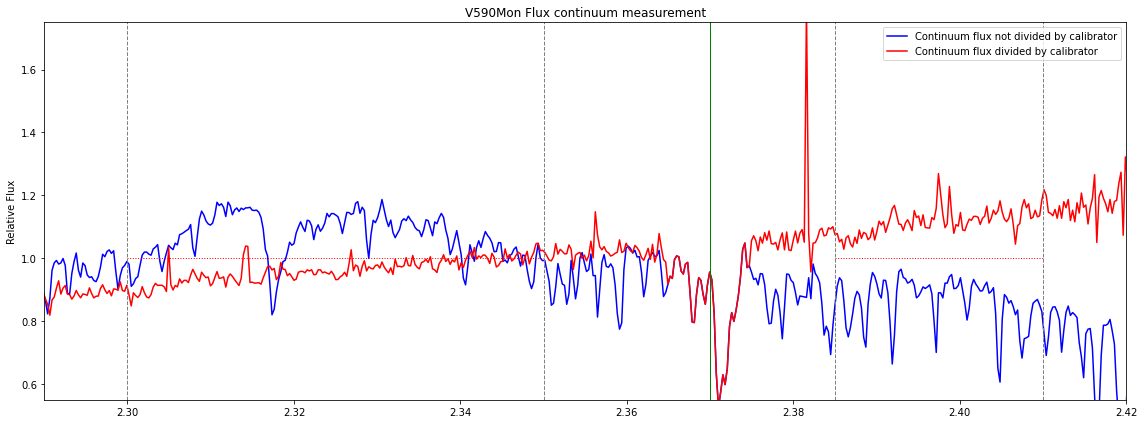

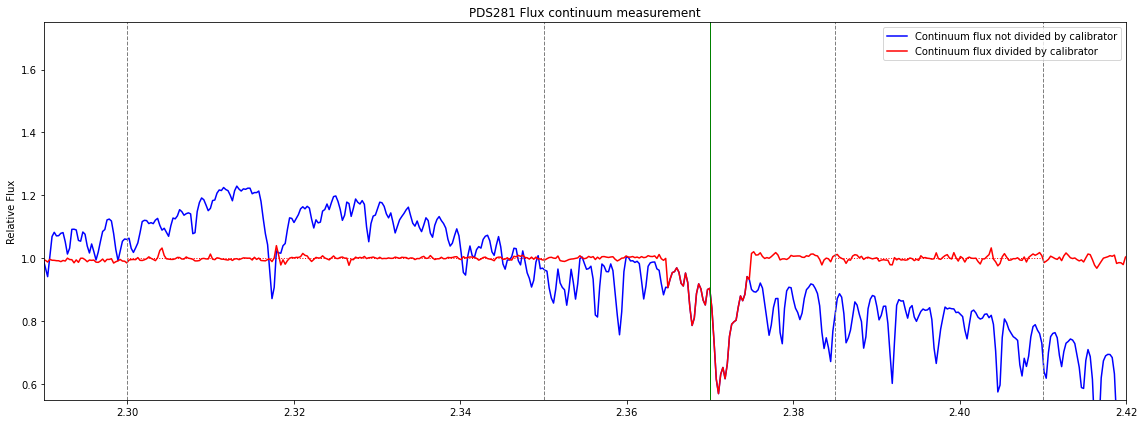

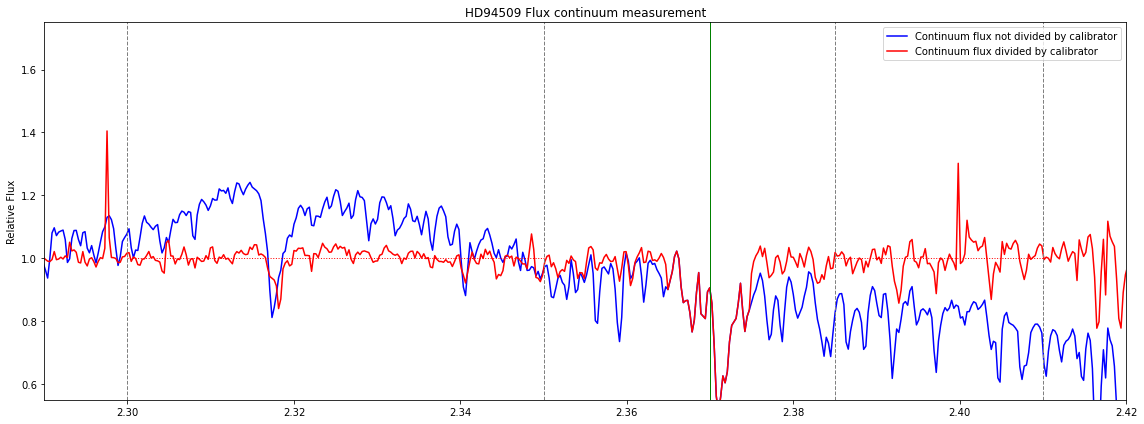

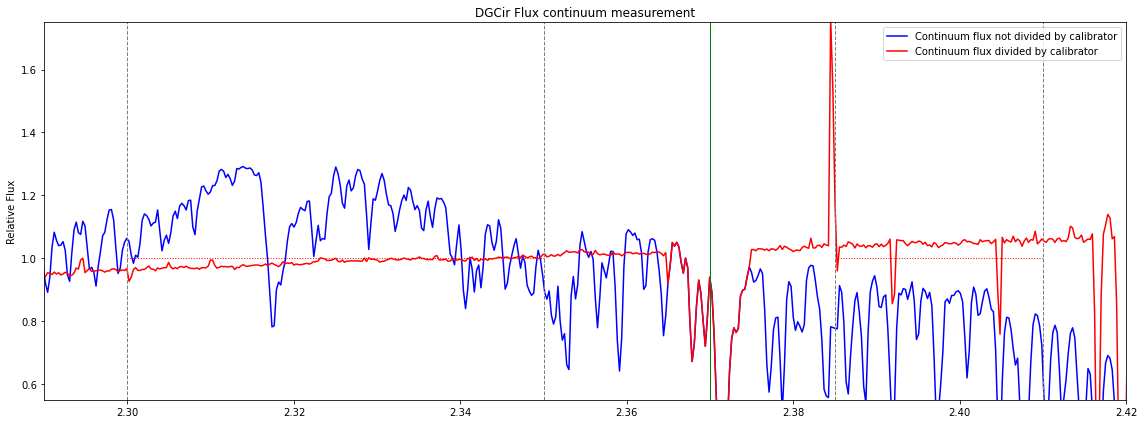

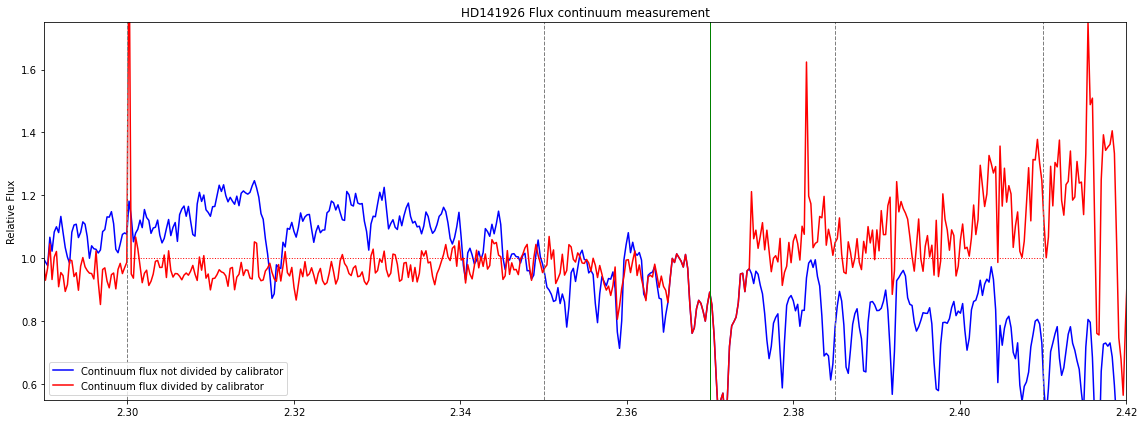

In [11]:
x_axis_lim = [2.135,2.195]
x_axis_lim = [2.29,2.42]

line_range=[2.365,2.375]

y_axis_lim =[0.55,1.75] 
continuum_range=[2.30,2.35,2.385,2.41]
#line_range=[2.1636,2.17]
miV590Mon.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,line_range, plot_figure, save_figure)

#y_axis_lim = [0.75,1.75]
#continuum_range=[2.14,2.16,2.17,2.19]
#line_range=[2.1615,2.17]
miPDS281.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,line_range, plot_figure, save_figure)

#y_axis_lim = [0.75,1.75]
#continuum_range=[2.15,2.163,2.17,2.183]
#line_range=[2.1647,2.1684]
miHD94509.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,line_range, plot_figure, save_figure)

#y_axis_lim = [0.75,1.75]
#continuum_range=[2.153,2.163,2.17,2.18]
#line_range=[2.1644,2.1684]
miDGCir.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,line_range, plot_figure, save_figure)

#y_axis_lim = [0.75,2.1]
#continuum_range=[2.14,2.16,2.17,2.19]
#line_range=[2.1638,2.168]
miHD141926.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,line_range, plot_figure, save_figure)


### Continuum Visibility measurement


Estimation of continuum_visibility2: {'U4U3': 0.0734236275519012, 'U4U2': 0.052115271335270275, 'U4U1': 0.0620657145548404, 'U3U2': 0.2256363600725809, 'U3U1': 0.0910407599426889, 'U2U1': 0.15610686261080978}
Estimation of continuum_visibility2: {'U4U3': 0.9869426136013626, 'U4U2': 0.9979294357296853, 'U4U1': 0.9901091457661076, 'U3U2': 0.9913975584302737, 'U3U1': 0.9639725119852142, 'U2U1': 0.9870973698814869}
Estimation of continuum_visibility2: {'U4U3': 0.9670845185076212, 'U4U2': 0.9637276617310271, 'U4U1': 0.986061317618359, 'U3U2': 0.942031030034755, 'U3U1': 0.9552546181998847, 'U2U1': 0.9452608307220081}
Estimation of continuum_visibility2: {'U4U3': 0.7624048261725016, 'U4U2': 0.7080106011598197, 'U4U1': 0.6190412673931875, 'U3U2': 0.7764260111537833, 'U3U1': 0.6781236116937153, 'U2U1': 0.7890817709633369}
Estimation of continuum_visibility2: {'U4U3': 1.0669620264671607, 'U4U2': 0.9318745052442629, 'U4U1': 1.0382247202975368, 'U3U2': 0.9524466592647193, 'U3U1': 1.011490856209966

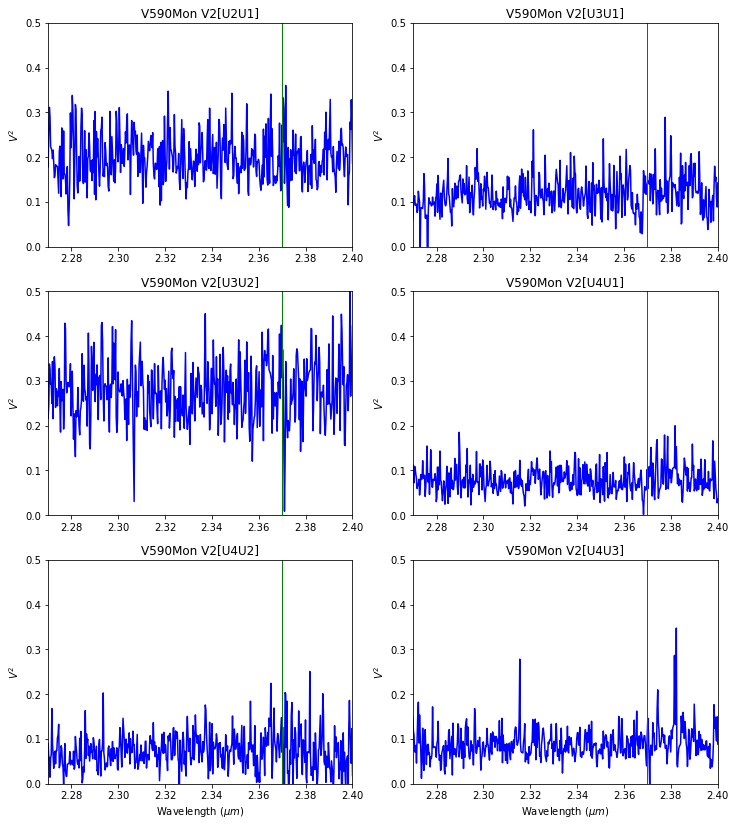

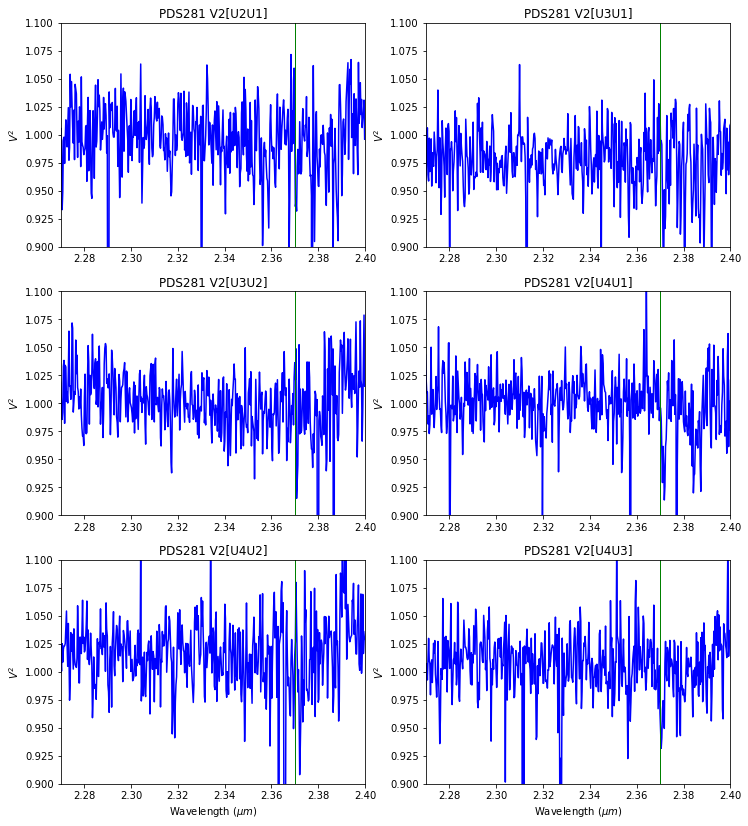

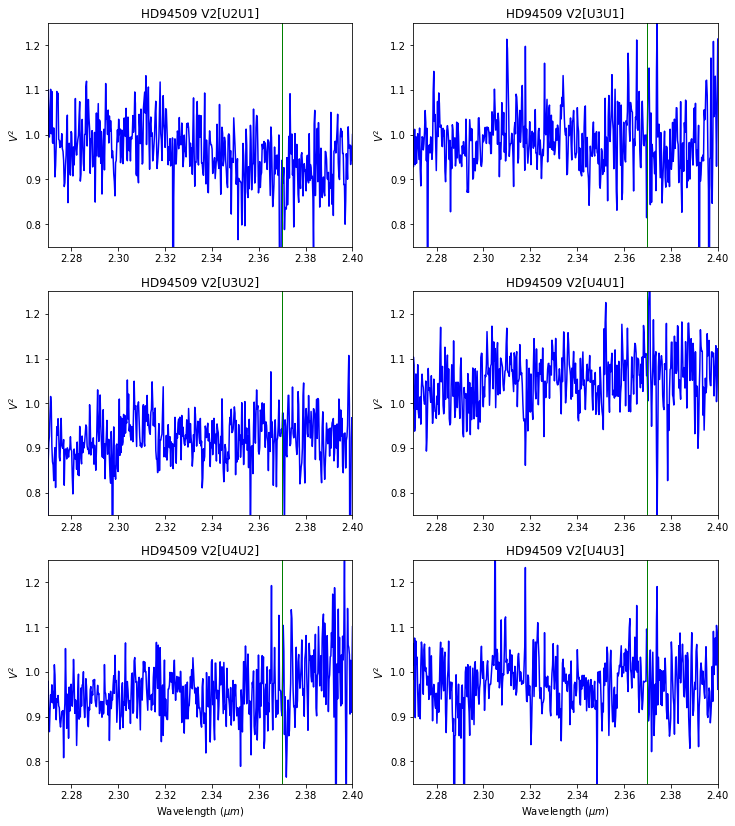

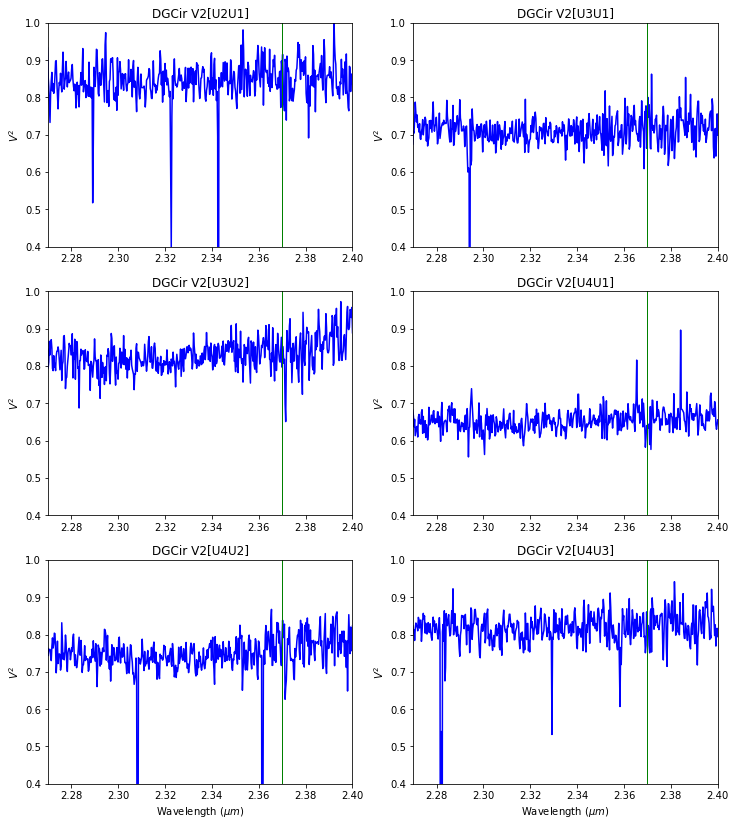

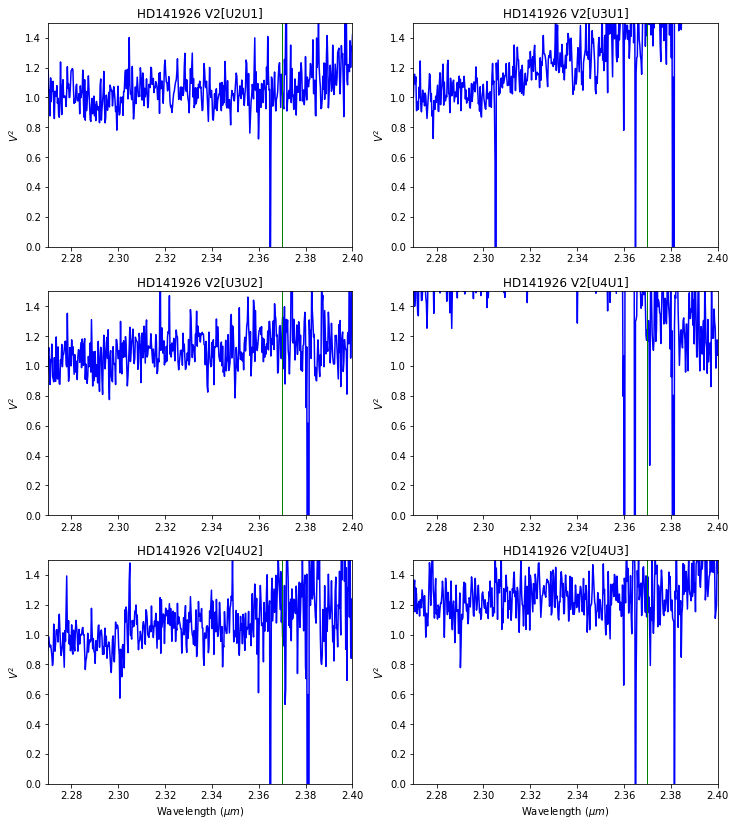

In [12]:
x_axis_lim = [2.14,2.17]
x_axis_lim = [2.27,2.4]

line_range=[2.36,2.38]


#x_axis_lim = Brg
y_axis_lim = [0,0.5]
continuum_range=[2.141,2.1604]
miV590Mon.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [0.9,1.1]
continuum_range=[2.1552,2.1615]
miPDS281.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [0.75,1.25]
continuum_range=[2.1546,2.1635]
miHD94509.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [0.4,1]
continuum_range=[2.153,2.163]
miDGCir.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [0.0,1.5]
continuum_range=[2.153,2.163]
miHD141926.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)



### Continuum Differential Phase measurement


V590Mon Estimation of continuum_diff_phase: {'U4U3': 0.7714762015669265, 'U4U2': 1.5276088869391062, 'U4U1': -0.4329793704107203, 'U3U2': -0.592599870941342, 'U3U1': -0.2677253346701747, 'U2U1': 0.8768160033035741} +- {'U4U3': 9.874886064825963, 'U4U2': 15.830016509642075, 'U4U1': 10.580526754097685, 'U3U2': 6.969196185943863, 'U3U1': 9.302996179964792, 'U2U1': 7.685996906760485}

PDS281 Estimation of continuum_diff_phase: {'U4U3': -0.2370642875839195, 'U4U2': -0.3925141279018902, 'U4U1': 0.13626553978896538, 'U3U2': -0.20693829688363508, 'U3U1': 0.0977465230182446, 'U2U1': 0.3176485712850763} +- {'U4U3': 0.7567348041308088, 'U4U2': 0.7505239088780609, 'U4U1': 0.7465609876818503, 'U3U2': 0.7365638432904213, 'U3U1': 0.7121181276736193, 'U2U1': 0.6821273606239194}

HD94509 Estimation of continuum_diff_phase: {'U4U3': -0.5979222210412729, 'U4U2': -1.2447708316322945, 'U4U1': -0.6246434940945562, 'U3U2': -0.23291951463276916, 'U3U1': -0.19761242762362485, 'U2U1': 0.14363869750499703} +- {'

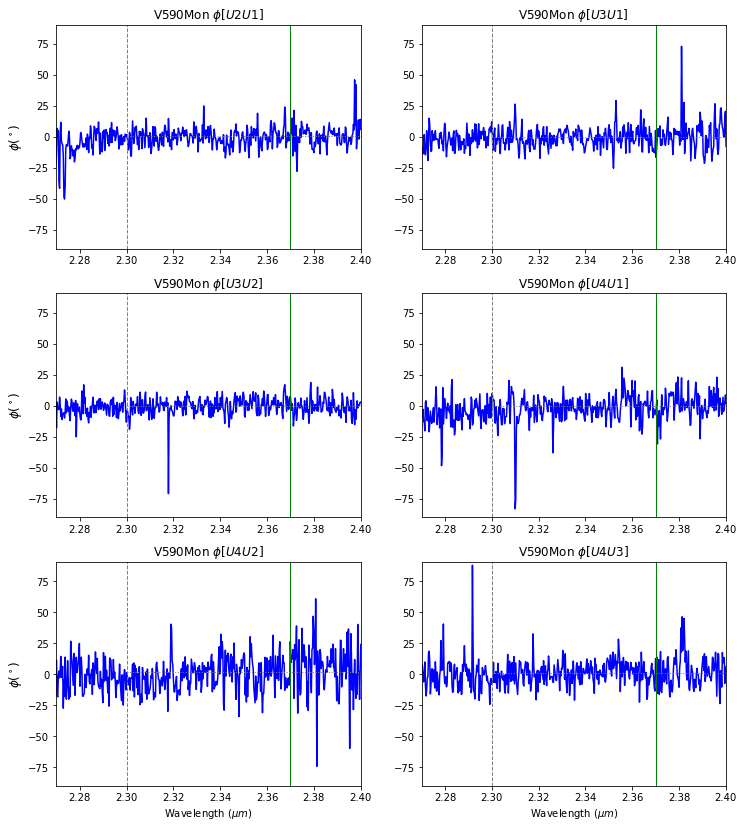

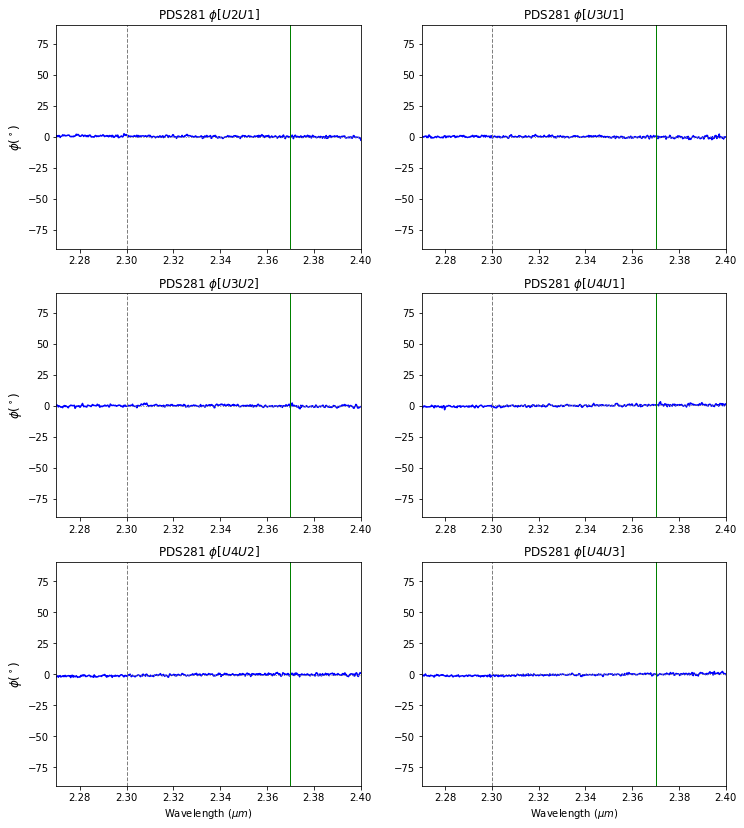

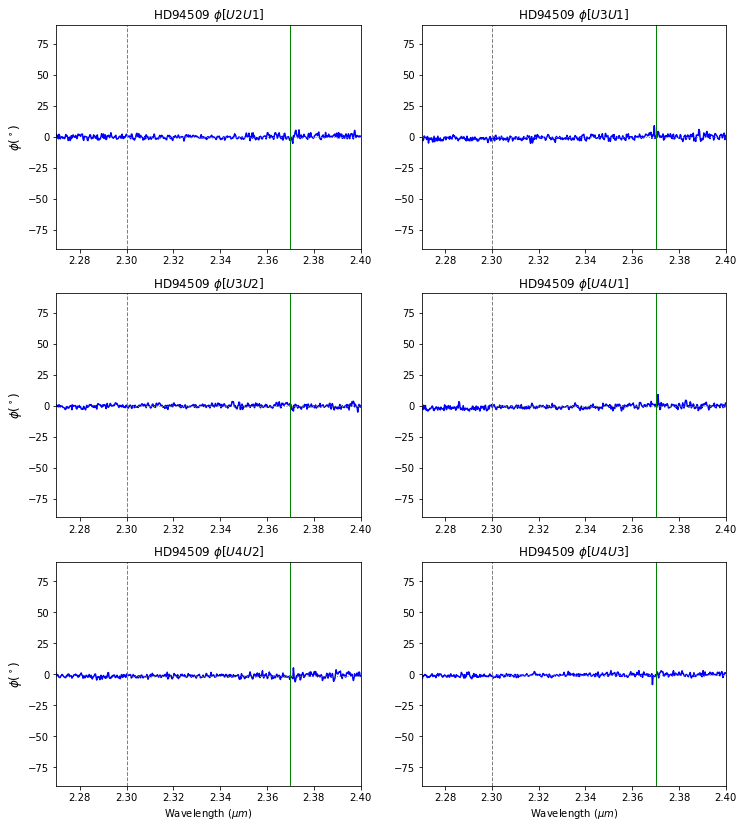

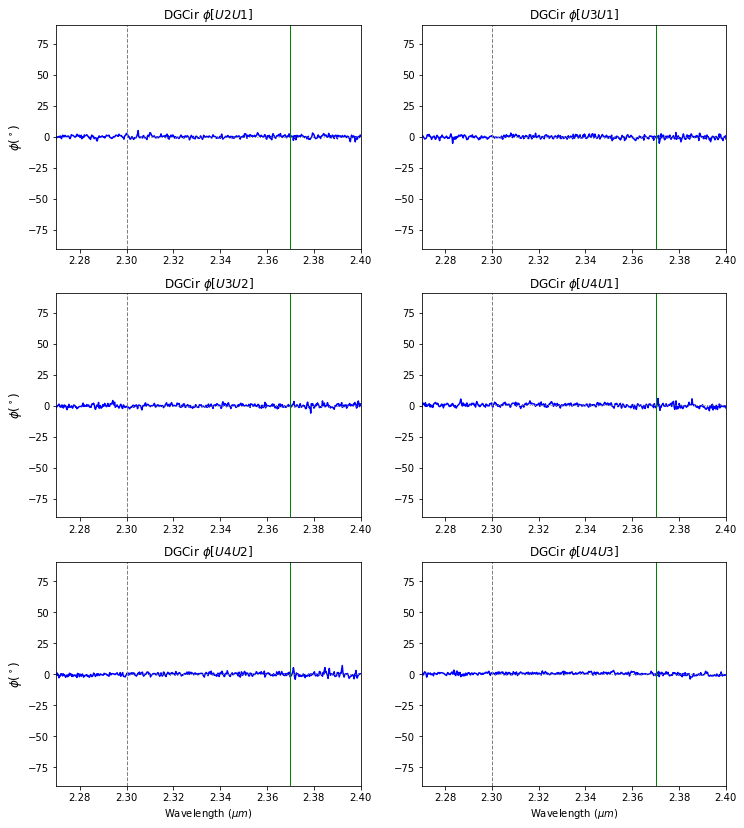

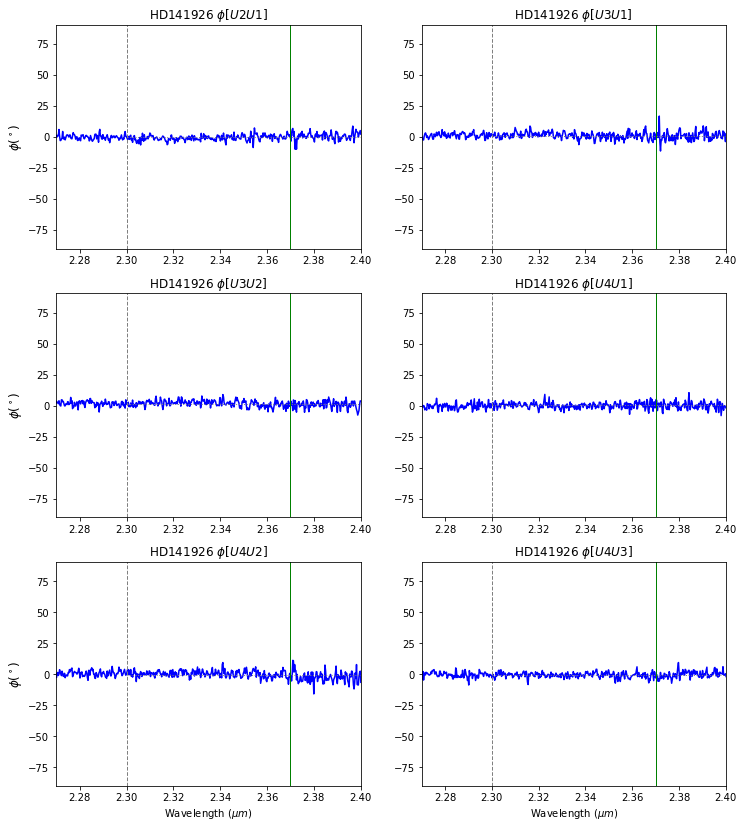

In [13]:

#x_axis_lim = Brg

continuum_range=[2.141,2.1604]
continuum_range=[2.30,2.41]

y_axis_lim = [-90,90.5]
#continuum_range=[2.141,2.1604]

miV590Mon.figure_diff_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

#y_axis_lim = [-7,7.5]
#continuum_range=[2.131,2.161]
miPDS281.figure_diff_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

#y_axis_lim = [-15,15]
#continuum_range=[2.1485,2.1644]
miHD94509.figure_diff_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

#y_axis_lim = [-10,10.5]
#continuum_range=[2.153,2.163]
miDGCir.figure_diff_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

#y_axis_lim = [-10,10.5]
#continuum_range=[2.153,2.163]
miHD141926.figure_diff_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)



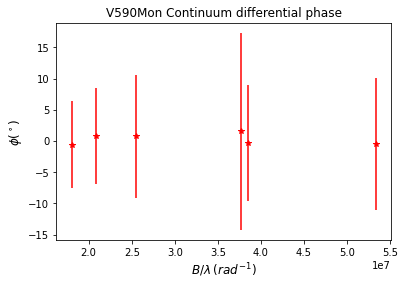

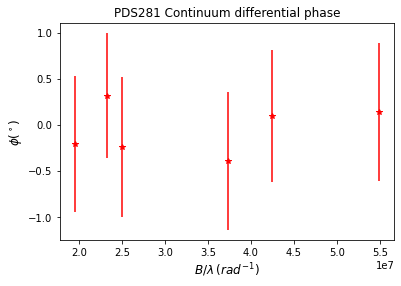

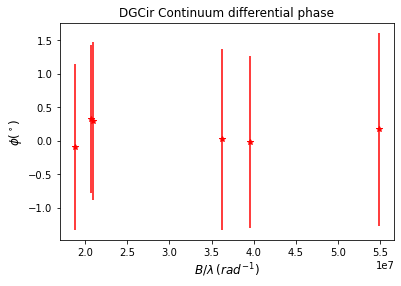

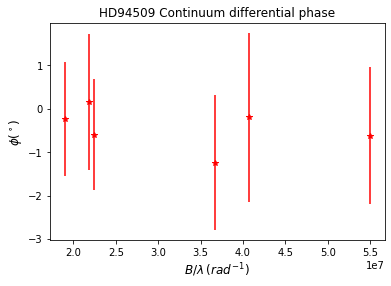

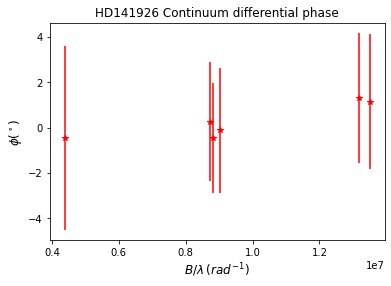

In [14]:
miV590Mon.figure_diff_phase_vs_spatial_frecuency(plot_figure, save_figure)
miPDS281.figure_diff_phase_vs_spatial_frecuency(plot_figure, save_figure)
miDGCir.figure_diff_phase_vs_spatial_frecuency(plot_figure, save_figure)
miHD94509.figure_diff_phase_vs_spatial_frecuency(plot_figure, save_figure)
miHD141926.figure_diff_phase_vs_spatial_frecuency(plot_figure, save_figure)


### Continuum Closure Phase measurement


V590Mon Estimation of continuum_closure_phase: {'U4U3U2': 24.391499927389404, 'U4U3U1': 10.939119705055374, 'U4U2U1': 9.820385391897446, 'U3U2U1': 21.313541018643846} +- {'U4U3U2': 21.636562741844717, 'U4U3U1': 19.21232868787806, 'U4U2U1': 21.81229402456423, 'U3U2U1': 17.67804974044124}

PDS281 Estimation of continuum_closure_phase: {'U4U3U2': -0.1579216697725201, 'U4U3U1': -0.0025374419854955477, 'U4U2U1': -0.6973075545796519, 'U3U2U1': -0.9578663595205938} +- {'U4U3U2': 1.1152238979685651, 'U4U3U1': 1.0630956661701652, 'U4U2U1': 1.0635959837288183, 'U3U2U1': 1.1150315571658431}

HD94509 Estimation of continuum_closure_phase: {'U4U3U2': 0.45669081176014004, 'U4U3U1': -0.7106095944517534, 'U4U2U1': 0.5161273626055589, 'U3U2U1': 0.8374789792243575} +- {'U4U3U2': 2.5921870388366135, 'U4U3U1': 2.617007316043041, 'U4U2U1': 2.678504154455732, 'U3U2U1': 2.9867670039005016}

DGCir Estimation of continuum_closure_phase: {'U4U3U2': -0.3510010913771424, 'U4U3U1': 0.07144269568084383, 'U4U2U1': -

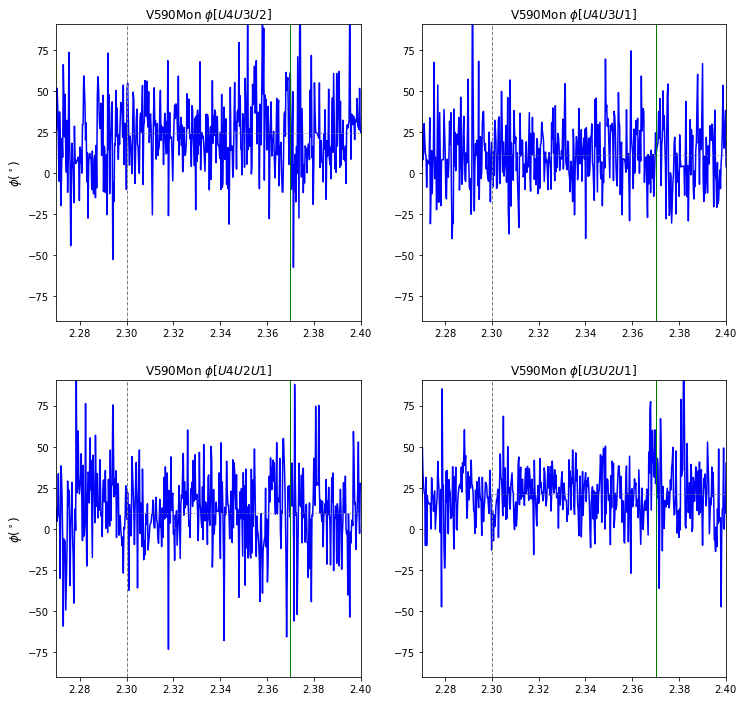

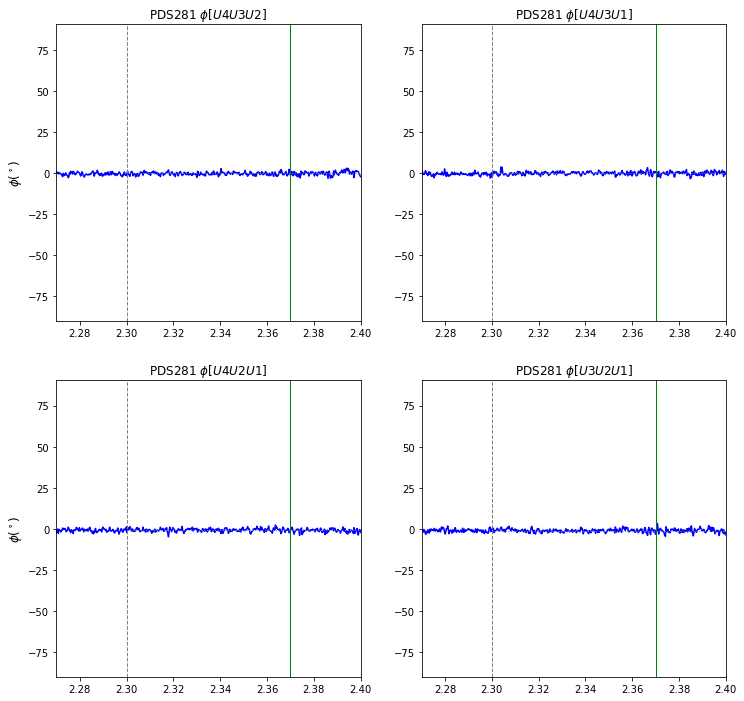

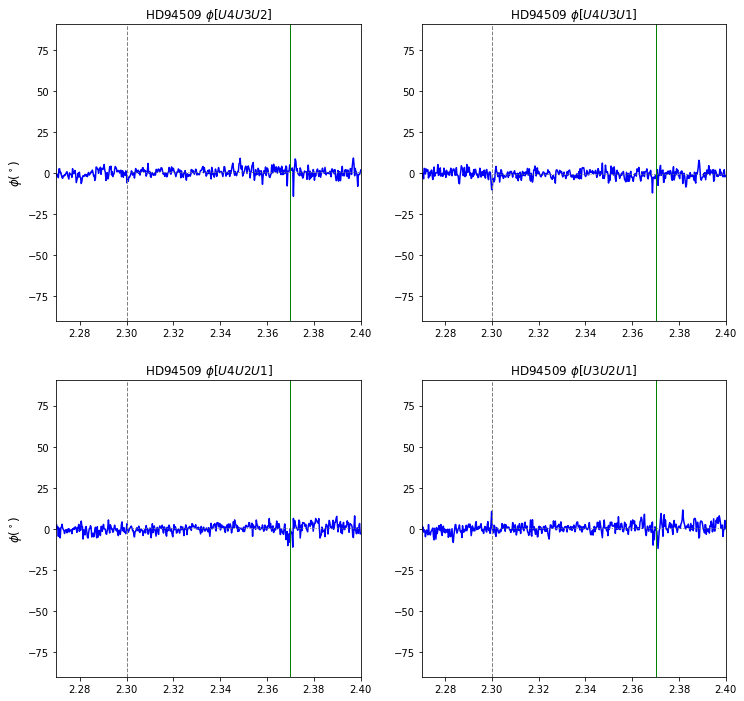

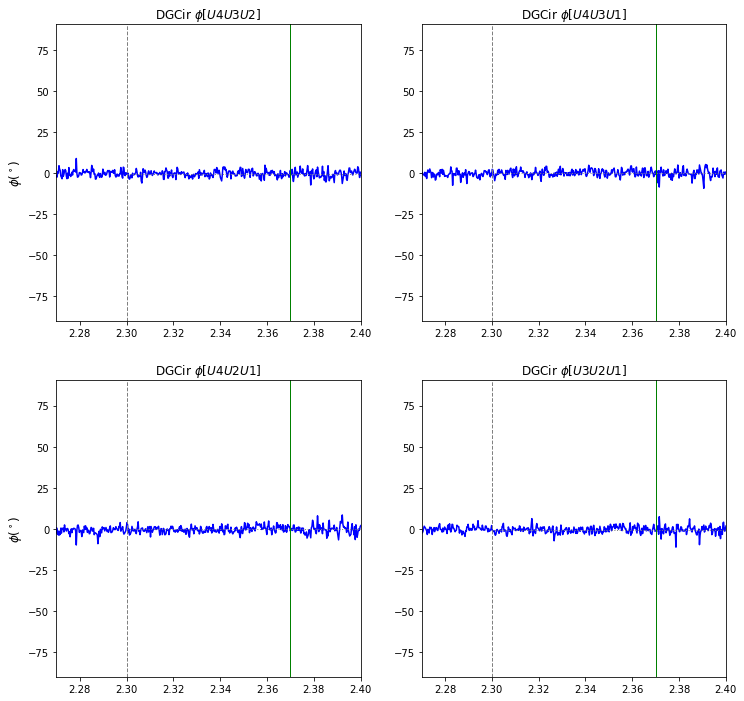

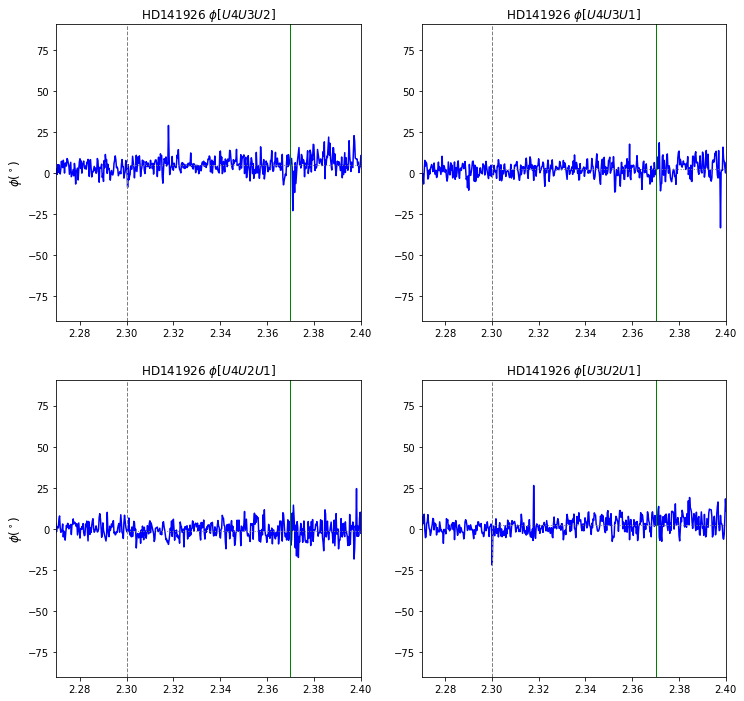

In [15]:

#x_axis_lim = Brg
#y_axis_lim = [-90,90.5]
#continuum_range=[2.141,2.1604]
miV590Mon.figure_closure_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)
#plot_figure=False

#y_axis_lim = [-7,7.5]
#continuum_range=[2.131,2.161]
miPDS281.figure_closure_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

#y_axis_lim = [-15,15]
#continuum_range=[2.1485,2.1644]
miHD94509.figure_closure_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

#y_axis_lim = [-10,10.5]
#continuum_range=[2.153,2.163]
miDGCir.figure_closure_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

#y_axis_lim = [-10,10.5]
#continuum_range=[2.153,2.163]
miHD141926.figure_closure_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)



### $Br\gamma$ visibility measurement
For each source is required to select the range correspondign to the $Br\gamma$ line. This selected range is the same applied to generate OIFITS files to be set as input to the LITpro model.
The maximum value for the squared visibility is measured for each source in that range and named *line_visibility2*.


> ⚠️ Warning: If Continuum Removal is applied afterwards, *line_visibility2* will be overwriten.
> 



Star: V590Mon
 Key:U4U3 | mean line visibility = nan                 +-0.023108609190190976 
 Key:U4U2 | mean line visibility = nan                 +-0.01561113478235315 
 Key:U4U1 | mean line visibility = nan                 +-0.018596593678472804 
 Key:U3U2 | mean line visibility = nan                 +-0.04683786888791682 
 Key:U3U1 | mean line visibility = nan                 +-0.01891196831946941 
 Key:U2U1 | mean line visibility = nan                 +-0.03794745555599438 

Star: PDS281
 Key:U4U3 | mean line visibility = nan                 +-0.017195069467488486 
 Key:U4U2 | mean line visibility = nan                 +-0.01317129959947465 
 Key:U4U1 | mean line visibility = nan                 +-0.014233123725503703 
 Key:U3U2 | mean line visibility = nan                 +-0.018624834207854348 
 Key:U3U1 | mean line visibility = nan                 +-0.013450457540366584 
 Key:U2U1 | mean line visibility = nan                 +-0.016940460058858214 

Star: HD94509
 Key:U4U3 | me

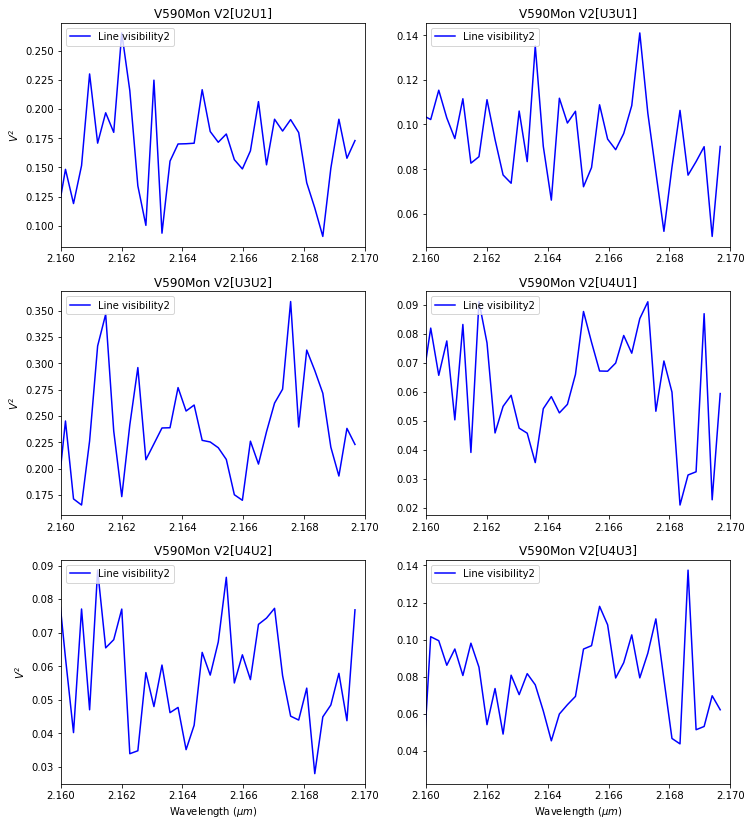

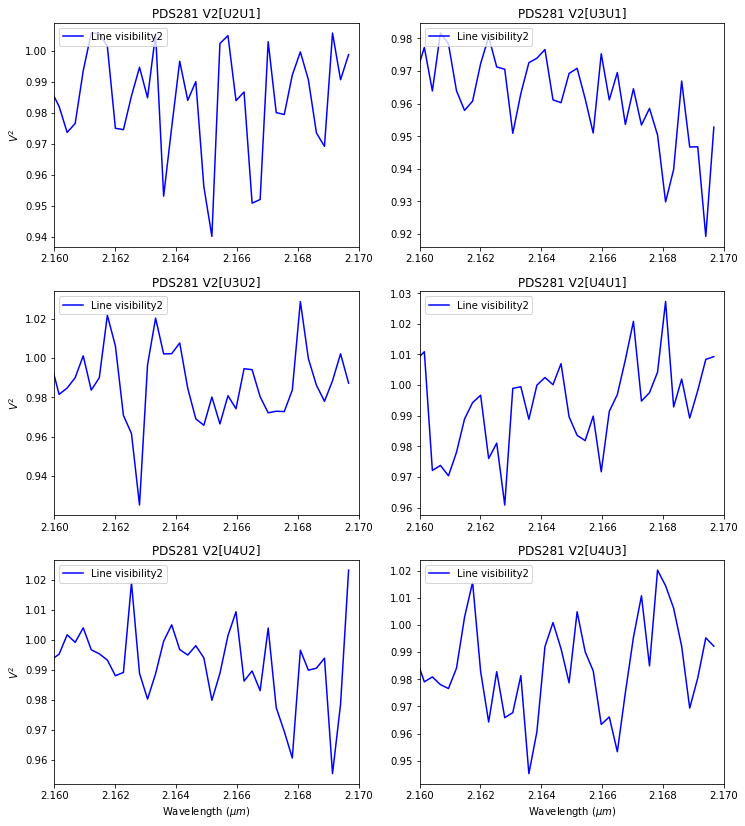

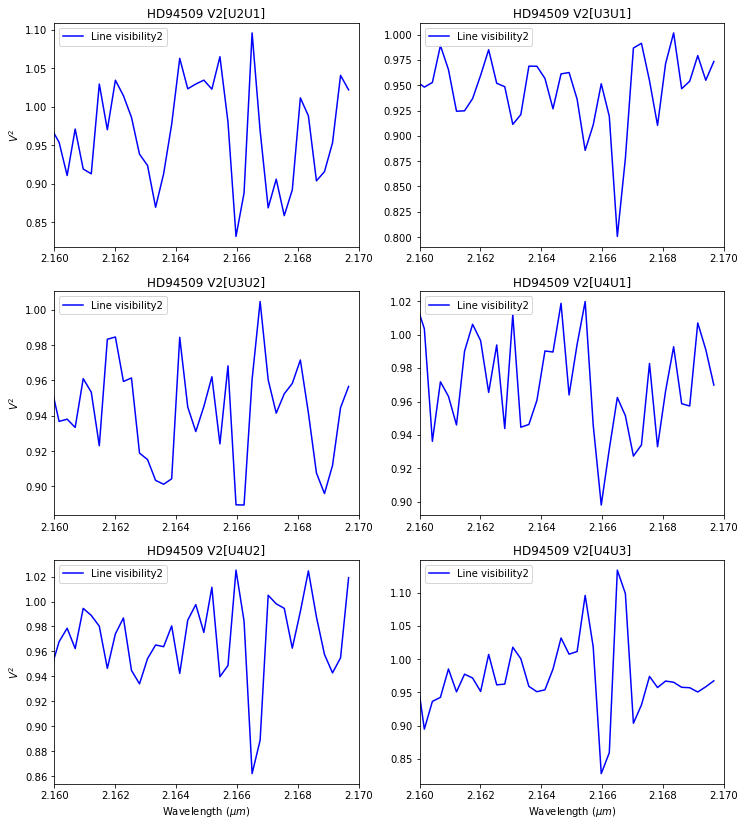

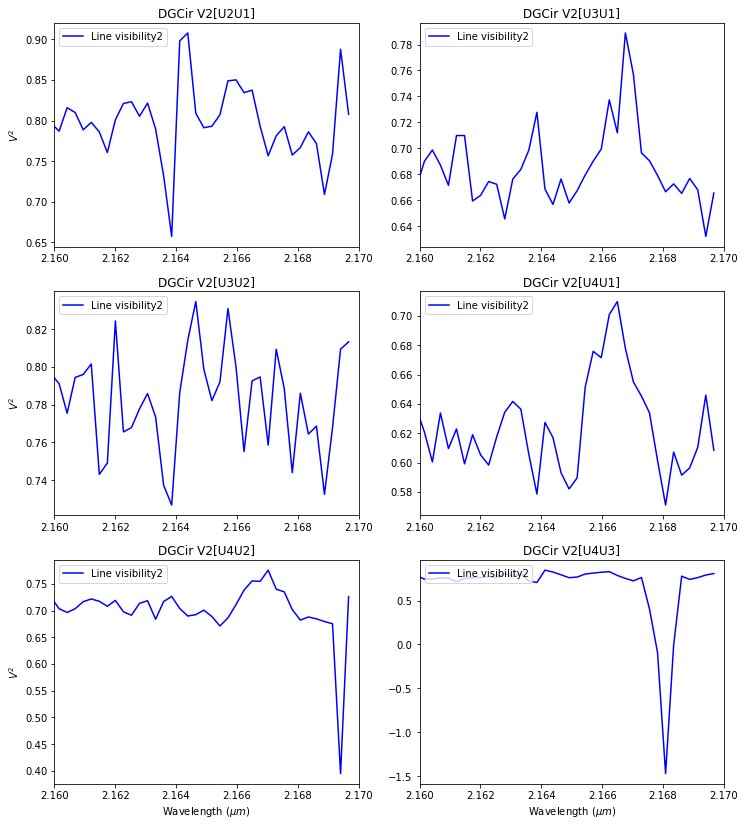

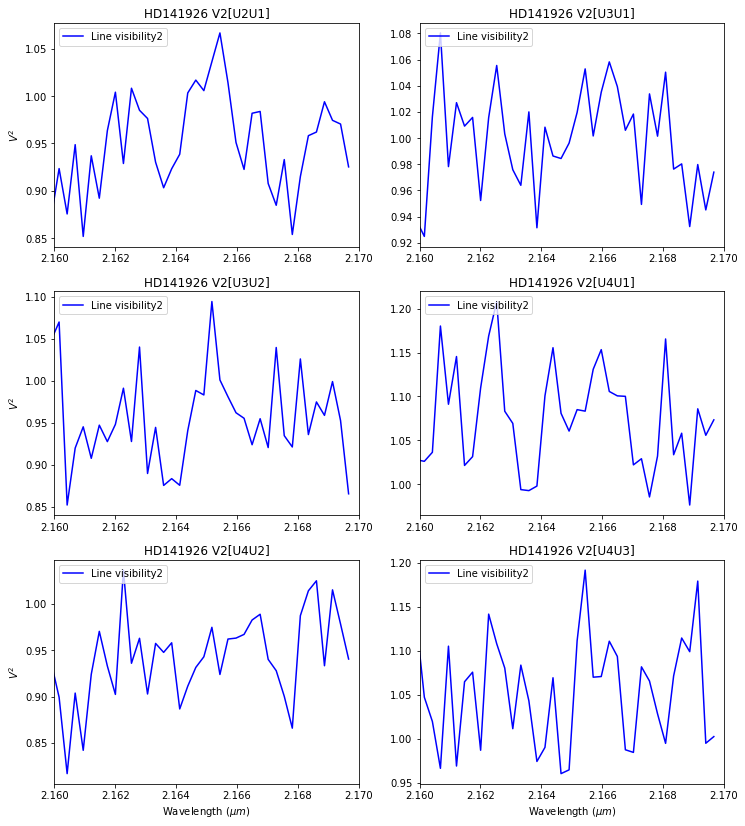

In [16]:
x_axis_lim = [2.27,2.4]

plot_range = [2.16,2.17]

#line_range = [2.1652,2.168]
miV590Mon.figure_line_visibility2_calculation(line_range, plot_range, plot_figure, save_figure)

#line_range = [2.1645,2.169]
miPDS281.figure_line_visibility2_calculation(line_range, plot_range, plot_figure, save_figure)

#line_range = [2.1652,2.168]
miHD94509.figure_line_visibility2_calculation(line_range, plot_range, plot_figure, save_figure)

#line_range = [2.1652,2.1677]
miDGCir.figure_line_visibility2_calculation(line_range, plot_range, plot_figure, save_figure)

#line_range = [2.1640,2.1677]
miHD141926.figure_line_visibility2_calculation(line_range, plot_range, plot_figure, save_figure)

### Safe data to FITS file
Before appliying the continuum removal, the previous results are saved to FITS file to check applicability of  continuum removal process (see below).

In [17]:
output_filename = "before_cont_removal"

miV590Mon.write_to_files(output_filename)
miPDS281.write_to_files(output_filename)
miHD94509.write_to_files(output_filename)
miDGCir.write_to_files(output_filename)
miHD141926.write_to_files(output_filename)


### Continuum removal
Once the continuum around $Br\gamma$ is measured, we applied the continuum_corrector function to retrieve the flux and visibility of the line ($F_l$ and $V_l^2$, respectively).

This function provides the continuum corrected differential phase and visibility of a spectral line, and their errors.
See Eqs. (2) and (3) in Kraus et al. 2012, ApJ, 744, 19.

$$F_l^2 V_l^2 = F^2 V^2 + F_c^2 V_c^2 - 2 · FV · F_c V_c ·\cos\phi$$
$$\sin\phi_l = \sin\phi\frac{\mid FV\mid}{\mid F_l V_l \mid}$$
$$F_l = F - F_c$$

The function is call into the *figure_continuum_corrector()* function as:

*continuum_corrector(wavelength, F, error_F, V2, V2_error, phase, phase_error, cont_F, cont_V2, result_Vl2, result_phasel)*

while *figure_continuum_corrector()* requires x_axis_lim, y_axis_lim and line_range (array with the wavelengths of the line range borders). In order to set these values, check *figure_flux_continuum_measurement()* to evaluate the line range to select.

> ⚠️ Warning: Continuum Removal is not applied!
>
> The outcome is not increasing accuracy and it does increase error bars.

In [18]:
##Check figure_flux_continuum_measurement to evaluate the line range to select
#line_range=[2.16,2.17]
#
#
#line_range=[2.1636,2.17]
#x_axis_lim = [2.16,2.172]
#y_axis_lim = [0,1.2]
#miV590Mon.figure_continuum_corrector(x_axis_lim,y_axis_lim,plot_figure,save_figure)
#
#line_range=[2.1615,2.17]
#y_axis_lim = [0,3]
#miPDS281.figure_continuum_corrector(x_axis_lim,y_axis_lim,plot_figure, save_figure)
#
#line_range=[2.1647,2.1684]
#y_axis_lim = [0,5]
#miHD94509.figure_continuum_corrector(x_axis_lim,y_axis_lim,plot_figure, save_figure)
#
#line_range=[2.1644,2.1684]
#y_axis_lim = [0.4,1.2]
#y_axis_lim = [0,3]
#miDGCir.figure_continuum_corrector(x_axis_lim,y_axis_lim,plot_figure, save_figure)
#
#line_range=[2.1638,2.168]
#y_axis_lim = [0.6,1.4]
#y_axis_lim = [0,3]
#miHD141926.figure_continuum_corrector(x_axis_lim,y_axis_lim,plot_figure, save_figure)
#
#

In [19]:
#output_filename = "continuum_removed"
#
#miV590Mon.write_to_files(output_filename)
#miPDS281.write_to_files(output_filename)
#miHD94509.write_to_files(output_filename)
#miDGCir.write_to_files(output_filename)
#miHD141926.write_to_files(output_filename)

# Results 
### 3 plots: Flux, $V^2$ and differential phase for each baseline 



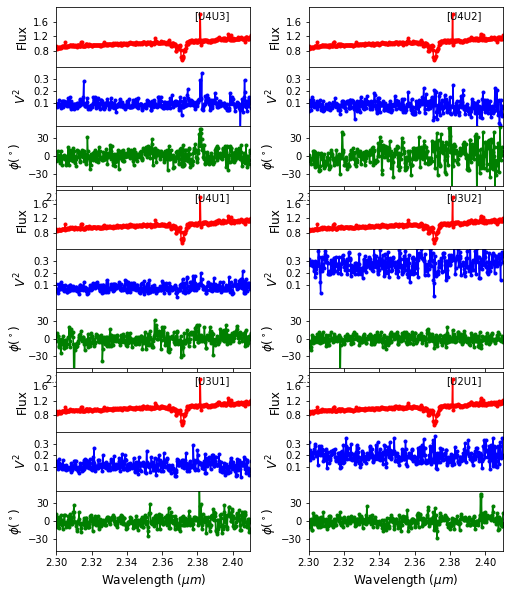

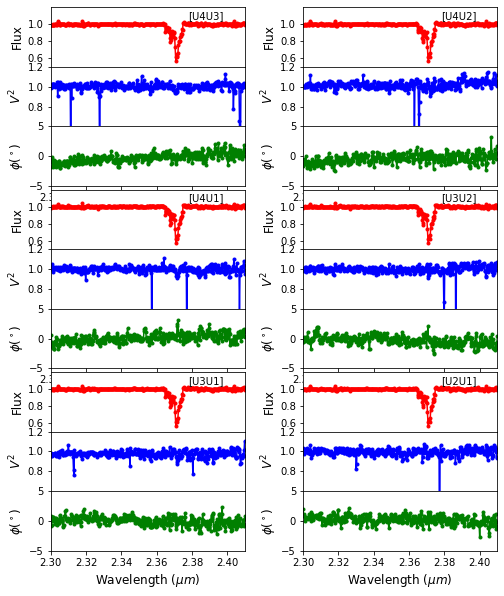

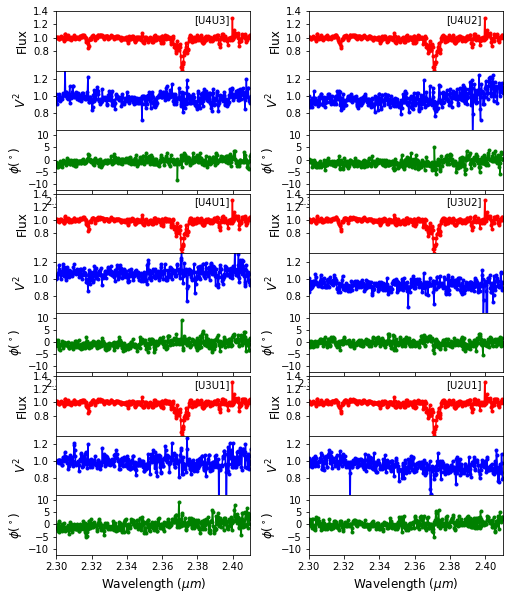

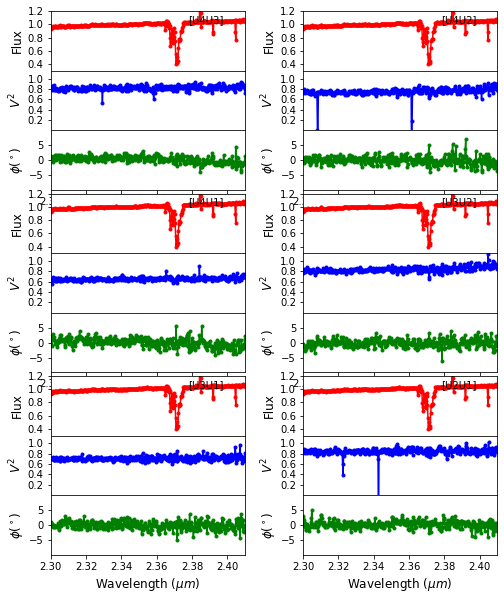

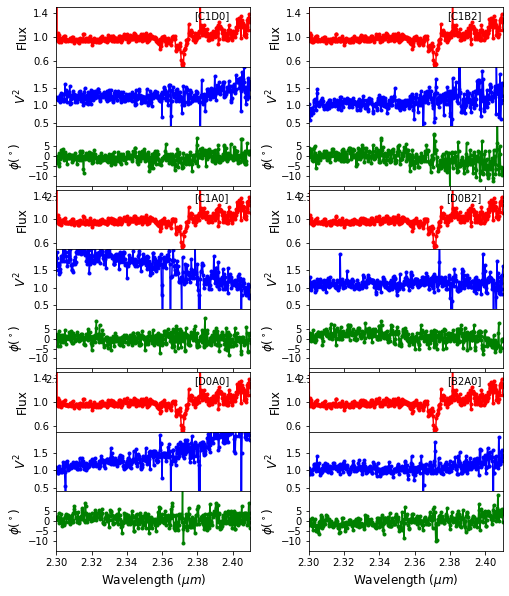

In [42]:

plot_figure = True
save_figure = True

x_axis_lim = [2.27,2.40]
#x_axis_lim = [2.165,2.167]
x_axis_lim = [2.30,2.41]

flux_ylim=[0.35,2.0]
visibility_ylim = [-0.10,0.4]
diff_phase_ylim = [-50,50]
flux_yticks=np.arange(0.8,1.9,0.4)
visibility_yticks =np.arange(0.1,0.35,0.1)
diff_phase_yticks=np.arange(-30,40,30)
miV590Mon.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim,flux_yticks,visibility_yticks,diff_phase_yticks,plot_figure, save_figure)

flux_ylim=[0.5,1.2]
visibility_ylim = [0.6,1.2]
diff_phase_ylim = [-5,5]
flux_yticks=np.arange(0.6,1.2,0.2)
visibility_yticks =np.arange(0.8,1.4,0.2)
diff_phase_yticks =np.arange(-5,6,5)
miPDS281.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim, flux_yticks, visibility_yticks,diff_phase_yticks,plot_figure, save_figure)

flux_ylim=[0.5,1.4]
visibility_ylim = [0.6,1.3]
diff_phase_ylim = [-12.5,12]
flux_yticks=np.arange(0.8,1.5,0.2)
visibility_yticks =np.arange(0.8,1.3,0.2)
diff_phase_yticks =np.arange(-10,11,5)
miHD94509.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim, flux_yticks, visibility_yticks,diff_phase_yticks,plot_figure, save_figure)

flux_ylim=[0.3,1.2]
visibility_ylim = [0,1.15]
diff_phase_ylim = [-10,10]
flux_yticks=np.arange(0.4,1.4,0.2)
visibility_yticks =np.arange(0.2,1.1,0.2)
diff_phase_yticks =np.arange(-5,10,5)
miDGCir.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim, flux_yticks, visibility_yticks,diff_phase_yticks,plot_figure, save_figure)


flux_ylim=[0.5,1.5]
visibility_ylim = [0.4,2.1]
diff_phase_ylim = [-15,15]
flux_yticks=np.arange(0.6,1.5,0.4)
visibility_yticks =np.arange(0.5,2,0.5)
diff_phase_yticks =np.arange(-10,10,5)
miHD141926.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim, flux_yticks, visibility_yticks,diff_phase_yticks,plot_figure, save_figure)

plot_figure = False


### Full bandwidth flux plot
This plot shows the full bandwidth of the science observation and a embeded zoom-in picture of the $Br\gamma$ region. The full picture includes science and calibrator relative in that region. 


In [43]:

x_axis_lim = [1.98,2.46]
flux_ylim = [0,18000] 
zoom_lower_xlim =2.163
zoom_higher_xlim = 2.170
zoom_ylim = [10000,18000] 
save_figure = False
miHD141926.figure_full_bandwidth_flux(x_axis_lim,flux_ylim, zoom_lower_xlim,zoom_higher_xlim,zoom_ylim,plot_figure, save_figure)


### Closure Phase

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

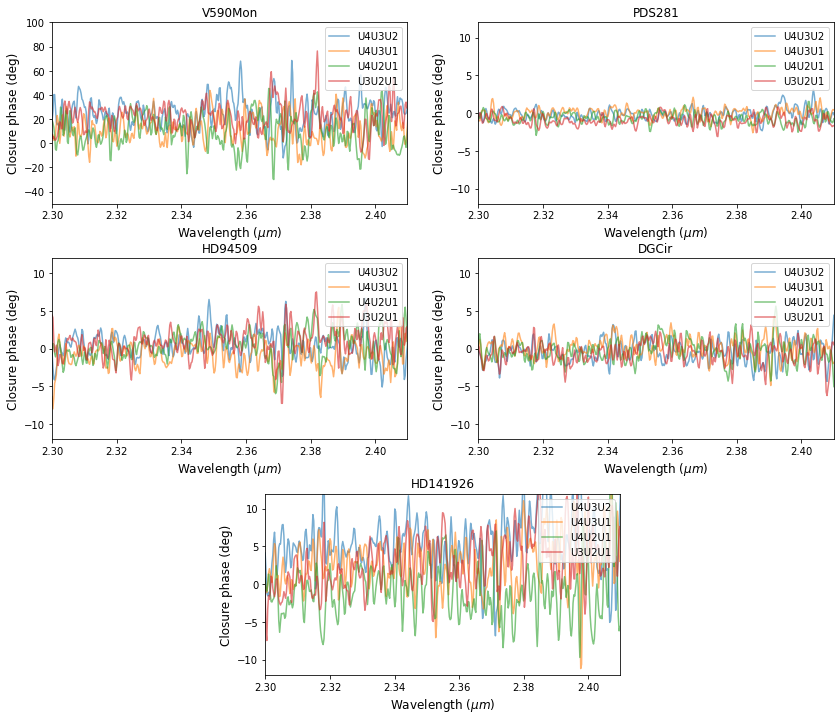

In [46]:
from scipy.signal import convolve as scipy_convolve

plot_figure=True
save_figure=True

fig = plt.figure(figsize =([14, 12])) 

gs = gridspec.GridSpec(3, 4, wspace = 0.5, hspace = 0.3) 
  
ax1 = plt.subplot(gs[0, 0:2]) 
ax2 = plt.subplot(gs[0, 2:4]) 
ax3 = plt.subplot(gs[1, 0:2]) 
ax4 = plt.subplot(gs[1, 2:4]) 
  
ax5 = plt.subplot(gs[2, 1:3]) 
axes = [ax1, ax2, ax3, ax4, ax5]

        
j=0

for source in all_sources:
    source.phase_closure_convolved = {} 
    
    #Plot closure phases
    for  key, value in source.phase_closure.items():
        #Set convolution kernel with low convolution range (stddev=1)   
        gaussian_kernel = Gaussian1DKernel(stddev=1, x_size=len(source.phase_closure[key]), mode='oversample')
        
        #Convolve average closure phase with gaussian_kernel
        source.phase_closure_convolved[key] = scipy_convolve(source.phase_closure[key],gaussian_kernel, mode='same')

        #axes[j].plot(source.wl_A,source.phase_closure[key], alpha=0.6, label=key)
        axes[j].plot(source.wl_A,source.phase_closure_convolved[key], alpha=0.6, label=key)

        #print('Closure phase of ',str(source.source),'[', str(key),']',': ',np.median(source.phase_closure[key]),'/pm',np.std(source.phase_closure[key]))
        axes[j].legend(loc=1, fontsize = 10) # upper left corner
        axes[j].set_ylabel('Closure phase (deg)', fontsize = 12)
        axes[j].set_xlabel('Wavelength ($\mu m$)', fontsize = 12)
        axes[j].set_title(str(source.source), fontsize=12)  
        axes[j].set_xlim([2.30,2.41]) 
        axes[j].set_ylim([-12,12])
        axes[j].axvline(miHD94509.Brg, color="grey", lw=1, ls='--')

    j=j+1

#Set different axis limit for V590 Mon 
axes[0].set_ylim([-50,100])
      
#Save figure to disk
if save_figure:
    fig.savefig("./figures/closure_phases_Brg.eps", dpi=300)

#Close figure if plot_figure=False
if plot_figure==False:
    plt.close(fig)    # close the figure window



### u,v coverage


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

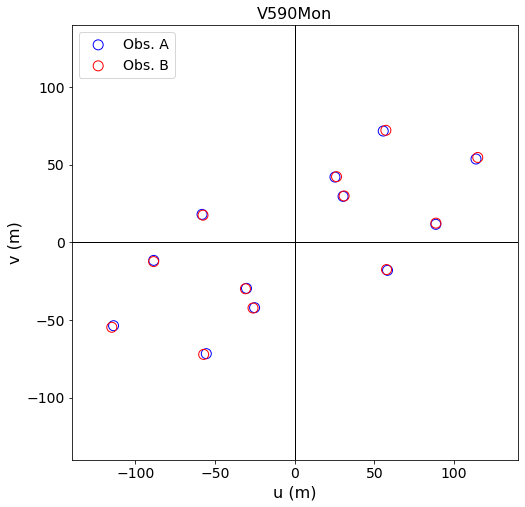

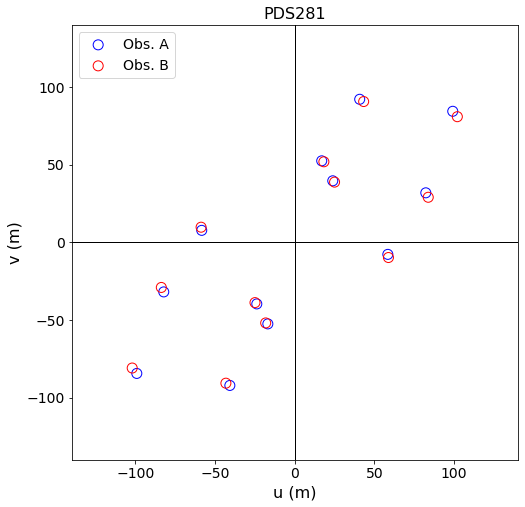

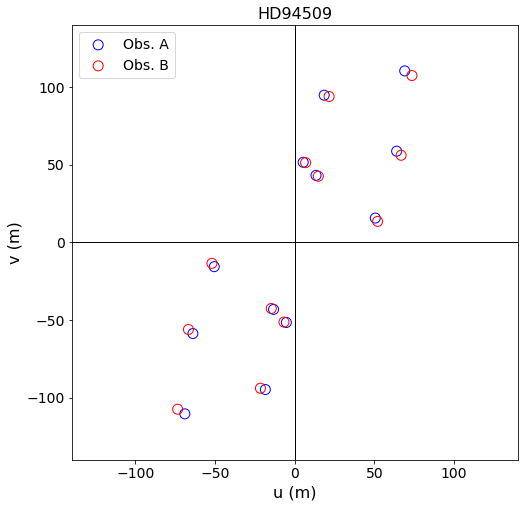

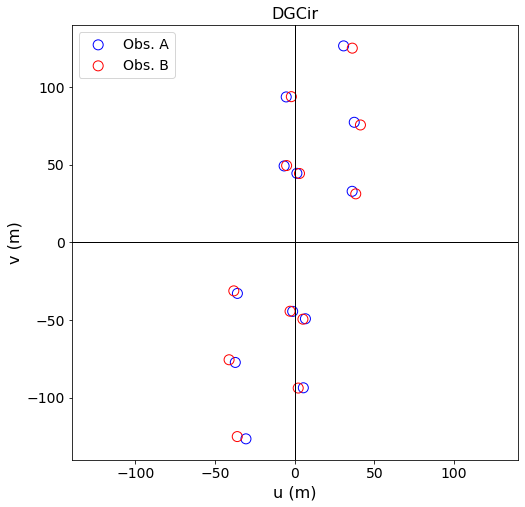

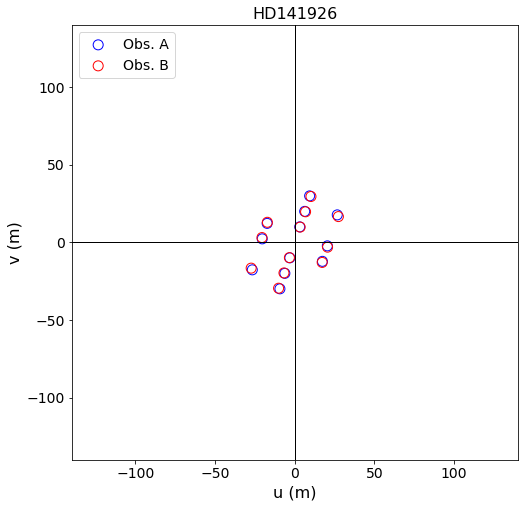

In [47]:

miV590Mon.figure_u_v_coverage(plot_figure, save_figure)
miPDS281.figure_u_v_coverage(plot_figure, save_figure)
miHD94509.figure_u_v_coverage(plot_figure, save_figure)
miDGCir.figure_u_v_coverage(plot_figure, save_figure)
miHD141926.figure_u_v_coverage(plot_figure, save_figure)